In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Emincan\Desktop\Dojo-Projects-Local\DATA\Daily Demand Forecasting Orders\Daily_Demand_Forecasting_Orders.csv', sep = ';')

target_col = 'Target (Total orders)'


print(f"DF shape :{df.shape}")

df.head()

DF shape :(60, 13)


,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [3]:
new_names = {
    'Week of the month (first week, second, third, fourth or fifth week': 'week_of_the_month',
    'Day of the week (Monday to Friday)': 'day_of_the_week'
}

df = df.rename(columns=new_names)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   week_of_the_month                          60 non-null     int64  
 1   day_of_the_week                            60 non-null     int64  
 2   Non-urgent order                           60 non-null     float64
 3   Urgent order                               60 non-null     float64
 4   Order type A                               60 non-null     float64
 5   Order type B                               60 non-null     float64
 6   Order type C                               60 non-null     float64
 7   Fiscal sector orders                       60 non-null     float64
 8   Orders from the traffic controller sector  60 non-null     int64  
 9   Banking orders (1)                         60 non-null     int64  
 10  Banking orders (2)          

In [5]:
for col in df.columns[:2]:
    df[col] = df[col].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   week_of_the_month                          60 non-null     category
 1   day_of_the_week                            60 non-null     category
 2   Non-urgent order                           60 non-null     float64 
 3   Urgent order                               60 non-null     float64 
 4   Order type A                               60 non-null     float64 
 5   Order type B                               60 non-null     float64 
 6   Order type C                               60 non-null     float64 
 7   Fiscal sector orders                       60 non-null     float64 
 8   Orders from the traffic controller sector  60 non-null     int64   
 9   Banking orders (1)                         60 non-null     int64   
 10  Banking orders (

In [7]:
num_cols = df.select_dtypes(exclude=['object','category']).columns.tolist()
cat_cols = df.select_dtypes(include=['category']).columns.tolist()

In [8]:
# Total Summary

def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: First 5 Rows Of Data'))
    display(set_frame_style(data[cols].describe(),f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan'))
    
check_data(df, 'Train data')
print('-'*100)
# check_data(df_test, 'Test data')
# print('-'*100)
# check_data(original, 'Original data')

,week_of_the_month,day_of_the_week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307000,223.270000,61.543000,175.586000,302.448000,0.000000,65556,44914,188411,14793,539.577000
1,1,5,128.633000,96.042000,38.058000,56.037000,130.580000,0.000000,40419,21399,89461,7679,224.675000
2,1,6,43.651000,84.375000,21.826000,25.125000,82.461000,1.386000,11992,3452,21305,14947,129.412000
3,2,2,171.297000,127.667000,41.542000,113.294000,162.284000,18.156000,49971,33703,69054,18423,317.120000
4,2,3,90.532000,113.526000,37.679000,56.618000,116.220000,6.459000,48534,19646,16411,20257,210.517000


,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


,week_of_the_month,day_of_the_week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
Unique Value Count,5,5,60,60,60,60,60,48,60,60,60,60,60


,week_of_the_month,day_of_the_week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,0,0,0,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


In [9]:
class CFG:
    """
    Purpose of the Class:
    - Transforming the feature engineering stage into an open-close format to reduce bugs
    - Expand/demonstrate the scope of tested features in the final solution, even if some features are not present.
    """
    
    target_col = 'Target (Total orders)'
    
    pass

# Train | Test Split

In [10]:
from sklearn.model_selection import train_test_split

df_train , df_test = train_test_split(df, test_size=0.2, random_state=34)

# EDA

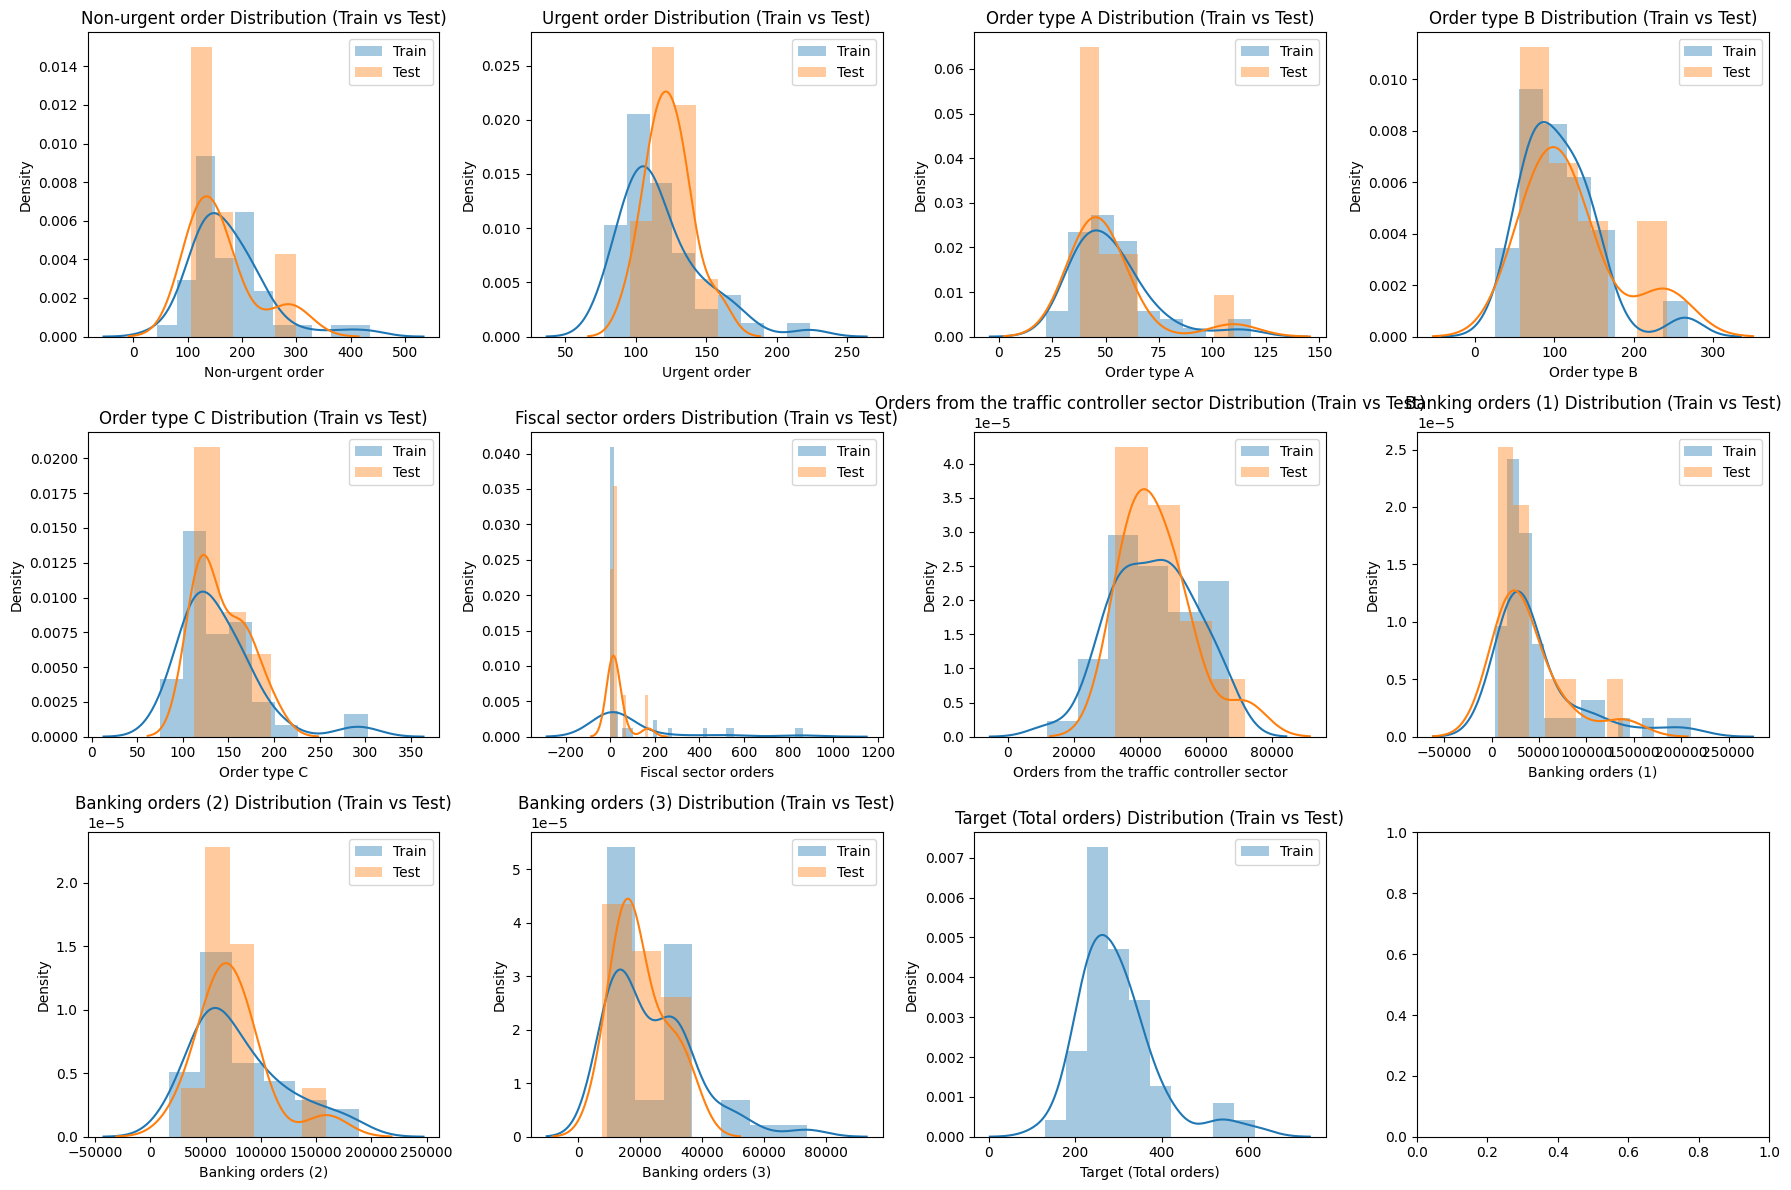

In [11]:
import warnings
warnings.filterwarnings("ignore")

def plot_histograms(df_train, df_test, target_col, n_cols=3):
    n_rows = (len(df_train.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df_train.columns.tolist()):
        if var_name != 'is_generated':
            ax = axes[i]
            sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:
                sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
            ax.set_title(f'{var_name} Distribution (Train vs Test)')
            ax.legend()

    plt.tight_layout()
    plt.show()

plot_histograms(df_train[num_cols], df_test[num_cols], target_col, n_cols=4)

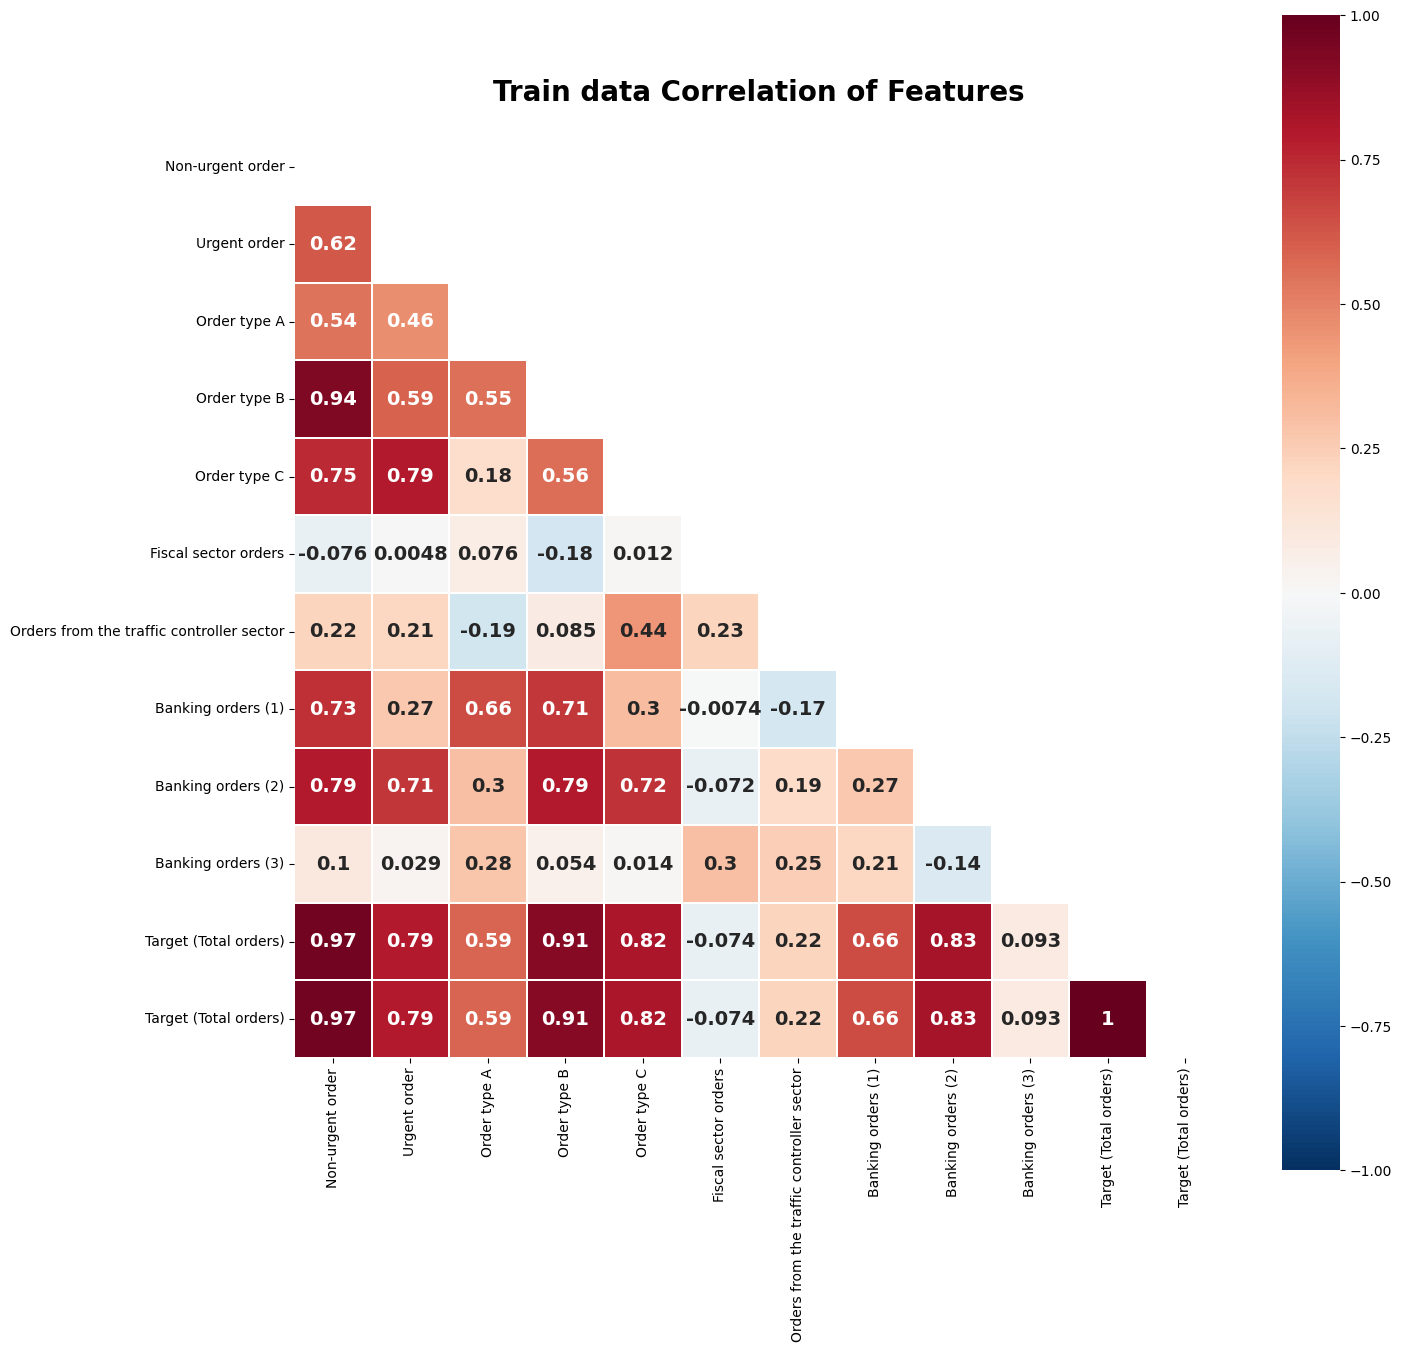

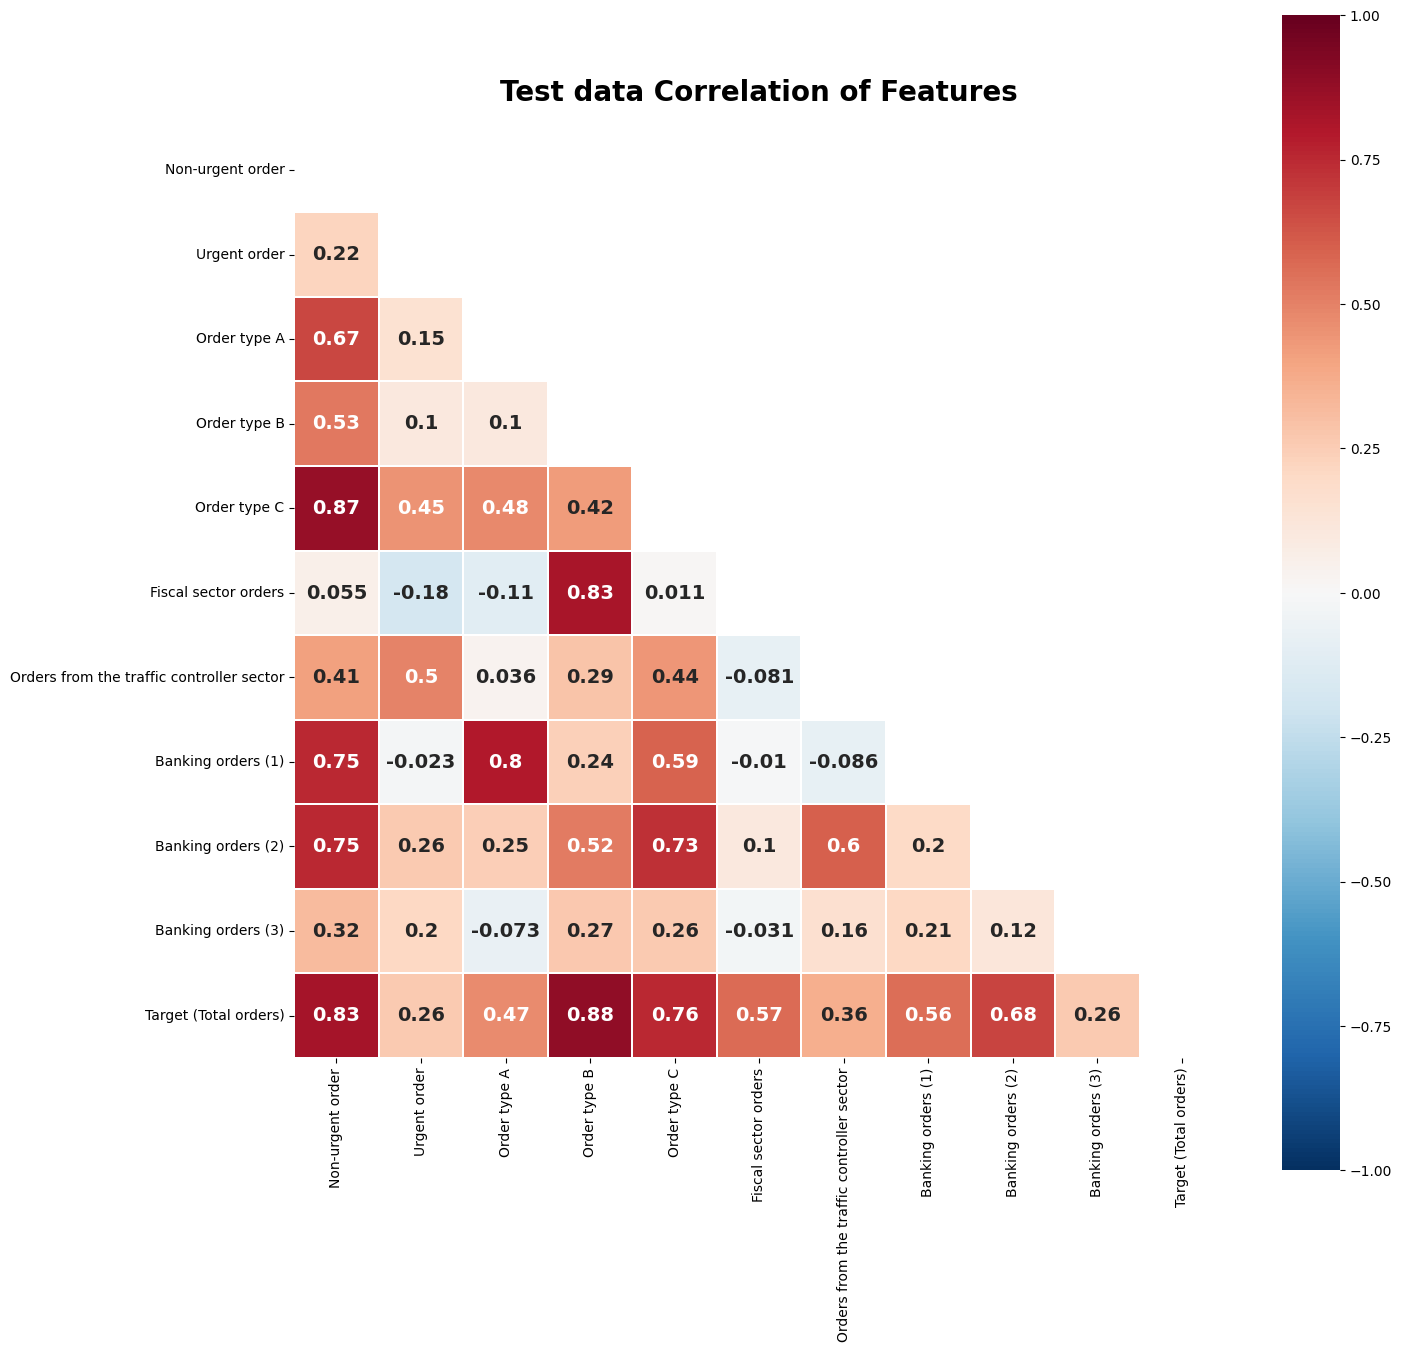

In [12]:
def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(15, 15))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=20)

    # Plot the heatmap with the masked diagonal elements
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 14, "weight": "bold"},
                mask=mask)

plot_heatmap(df_train[num_cols+[target_col]], title='Train data')
plot_heatmap(df_test[num_cols], title='Test data')
# plot_heatmap(original[num_cols+[target_col]], title='original')

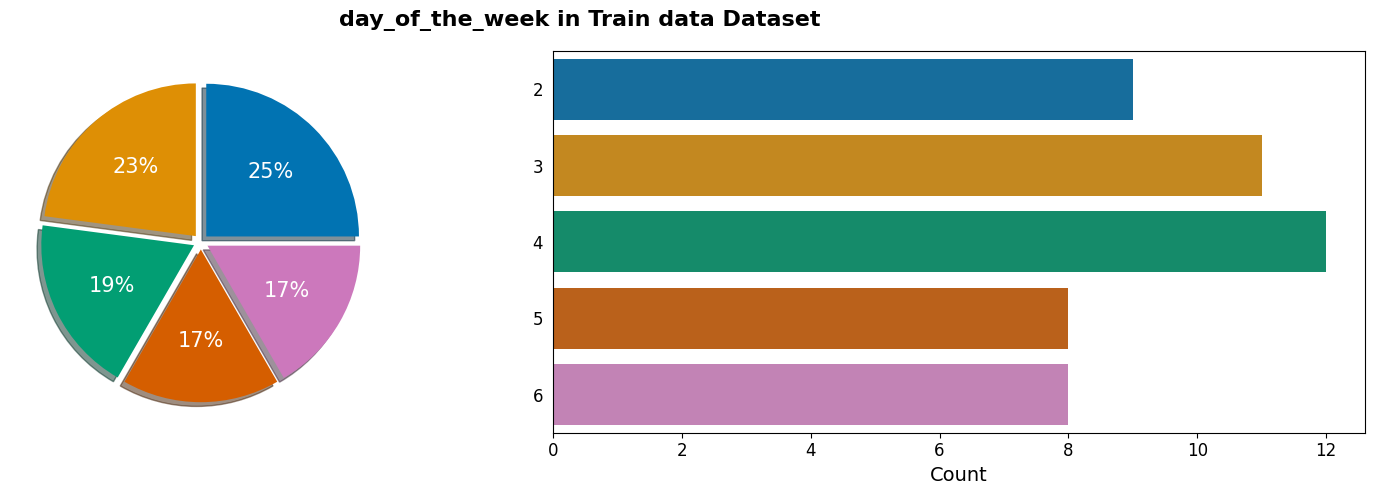

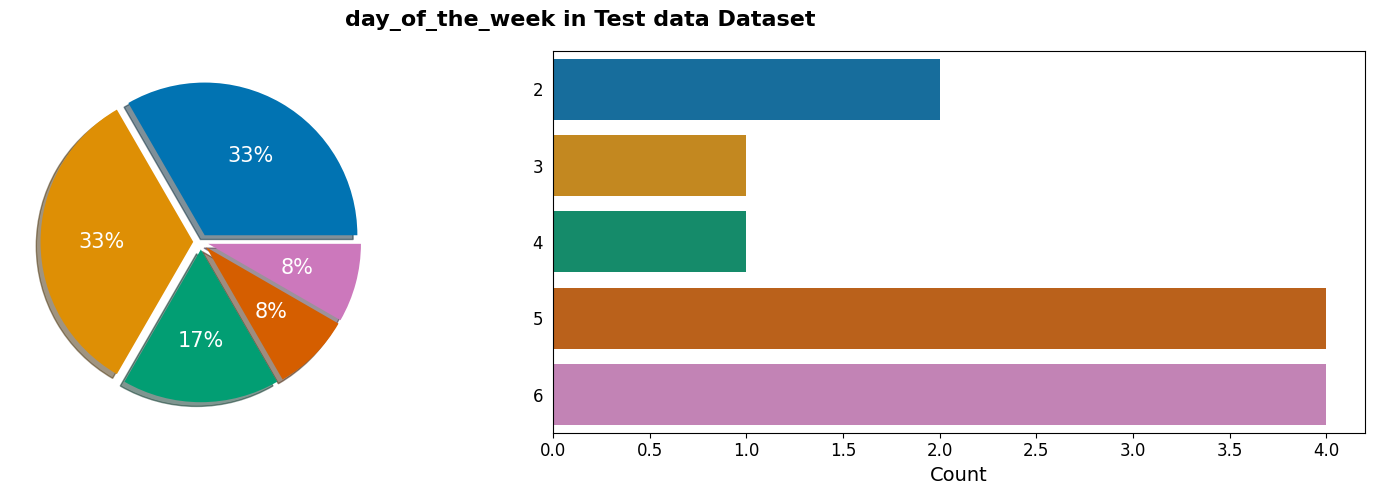

In [13]:
def plot_target_feature(df_train, target_col, figsize=(16,5), palette='colorblind', name='Train'):
    df_train = df_train.fillna('Nan')

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax = ax.flatten()

    # Pie chart
    pie_colors = sns.color_palette(palette, len(df_train[target_col].unique()))
    ax[0].pie(
        df_train[target_col].value_counts(),
        shadow=True,
        explode=[0.05] * len(df_train[target_col].unique()),
        autopct='%1.f%%',
        textprops={'size': 15, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].set_aspect('equal')  # Fix the aspect ratio to make the pie chart circular

    # Bar plot
    bar_colors = sns.color_palette(palette)
    sns.countplot(
        data=df_train,
        y=target_col,
        ax=ax[1],
        palette=bar_colors
    )
    ax[1].set_xlabel('Count', fontsize=14)
    ax[1].set_ylabel('')
    ax[1].tick_params(labelsize=12)
    ax[1].yaxis.set_tick_params(width=0)  # Remove tick lines for y-axis

    fig.suptitle(f'{target_col} in {name} Dataset', fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_target_feature(df_train, cat_cols[1], figsize=(16,5), palette='colorblind', name='Train data')
plot_target_feature(df_test, cat_cols[1], figsize=(16,5), palette='colorblind', name='Test data')

In [14]:
# def plot_scatter_with_fixed_col(df, fixed_col, hue=False, drop_cols=[], size=10, title=''):
#     sns.set_style('whitegrid')
    
#     if hue:
#         cols = df.columns.drop([hue, fixed_col] + drop_cols)
#     else:
#         cols = df.columns.drop([fixed_col] + drop_cols)
#     n_cols = 2
#     n_rows = (len(cols) - 1) // n_cols + 1
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(size, size/n_cols*n_rows), sharex=False, sharey=False)
#     fig.suptitle(f'{title} Set Scatter Plot with Target Column by {hue}', fontsize=24, fontweight='bold', y=1.01)

#     for i, col in enumerate(cols):
#         n_row = i // n_cols
#         n_col = i % n_cols
#         ax = axes[n_row, n_col]

#         ax.set_xlabel(f'{col}', fontsize=14)
#         ax.set_ylabel(f'{fixed_col}', fontsize=14)

#         # Plot the scatterplot
#         if hue:
#             sns.scatterplot(data=df, x=col, y=fixed_col, hue=hue, ax=ax,
#                             s=80, edgecolor='gray', alpha=0.35, palette='bright')
#             ax.legend(title=hue, title_fontsize=12, fontsize=12) # loc='upper right'
#         else:
#             sns.scatterplot(data=df, x=col, y=fixed_col, ax=ax,
#                             s=80, edgecolor='gray', alpha=0.35)

#         ax.tick_params(axis='both', which='major', labelsize=10)
#         ax.set_title(f'{col}', fontsize=18)
    
#     plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
#     plt.show()
    

# plot_scatter_with_fixed_col(df_train, fixed_col=target_col, hue=cat_cols[1], size=16, title='Train data')
# # plot_scatter_with_fixed_col(original, fixed_col=target_col, hue='Sex', size=16, title='Original data')

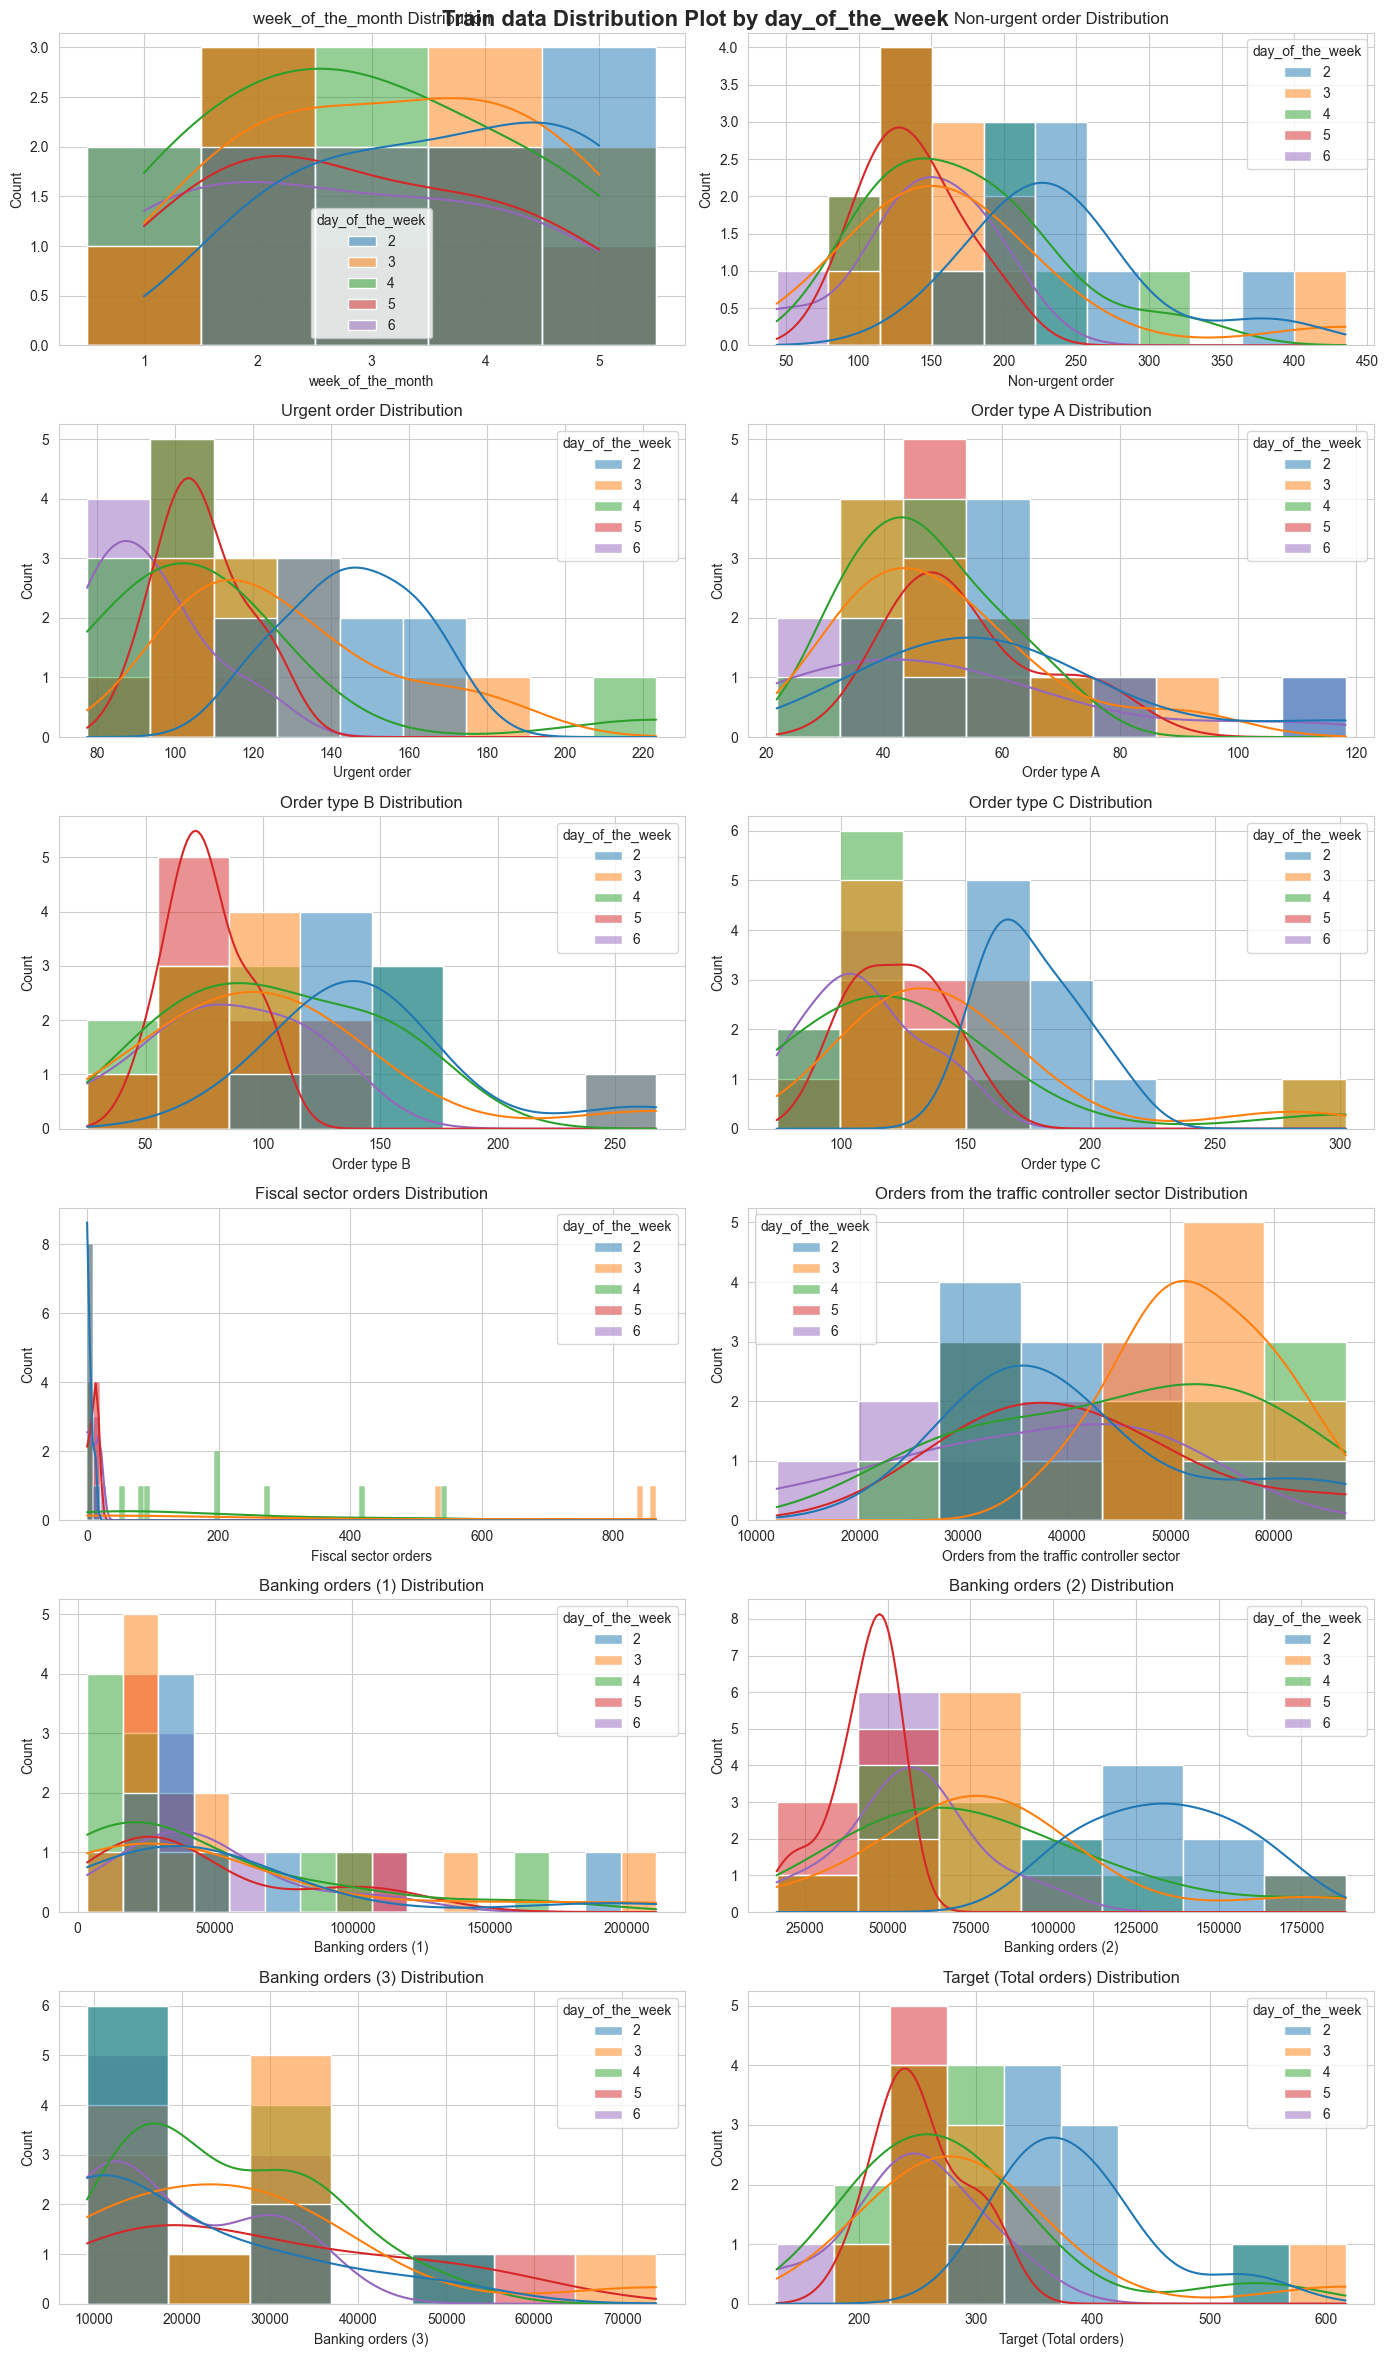

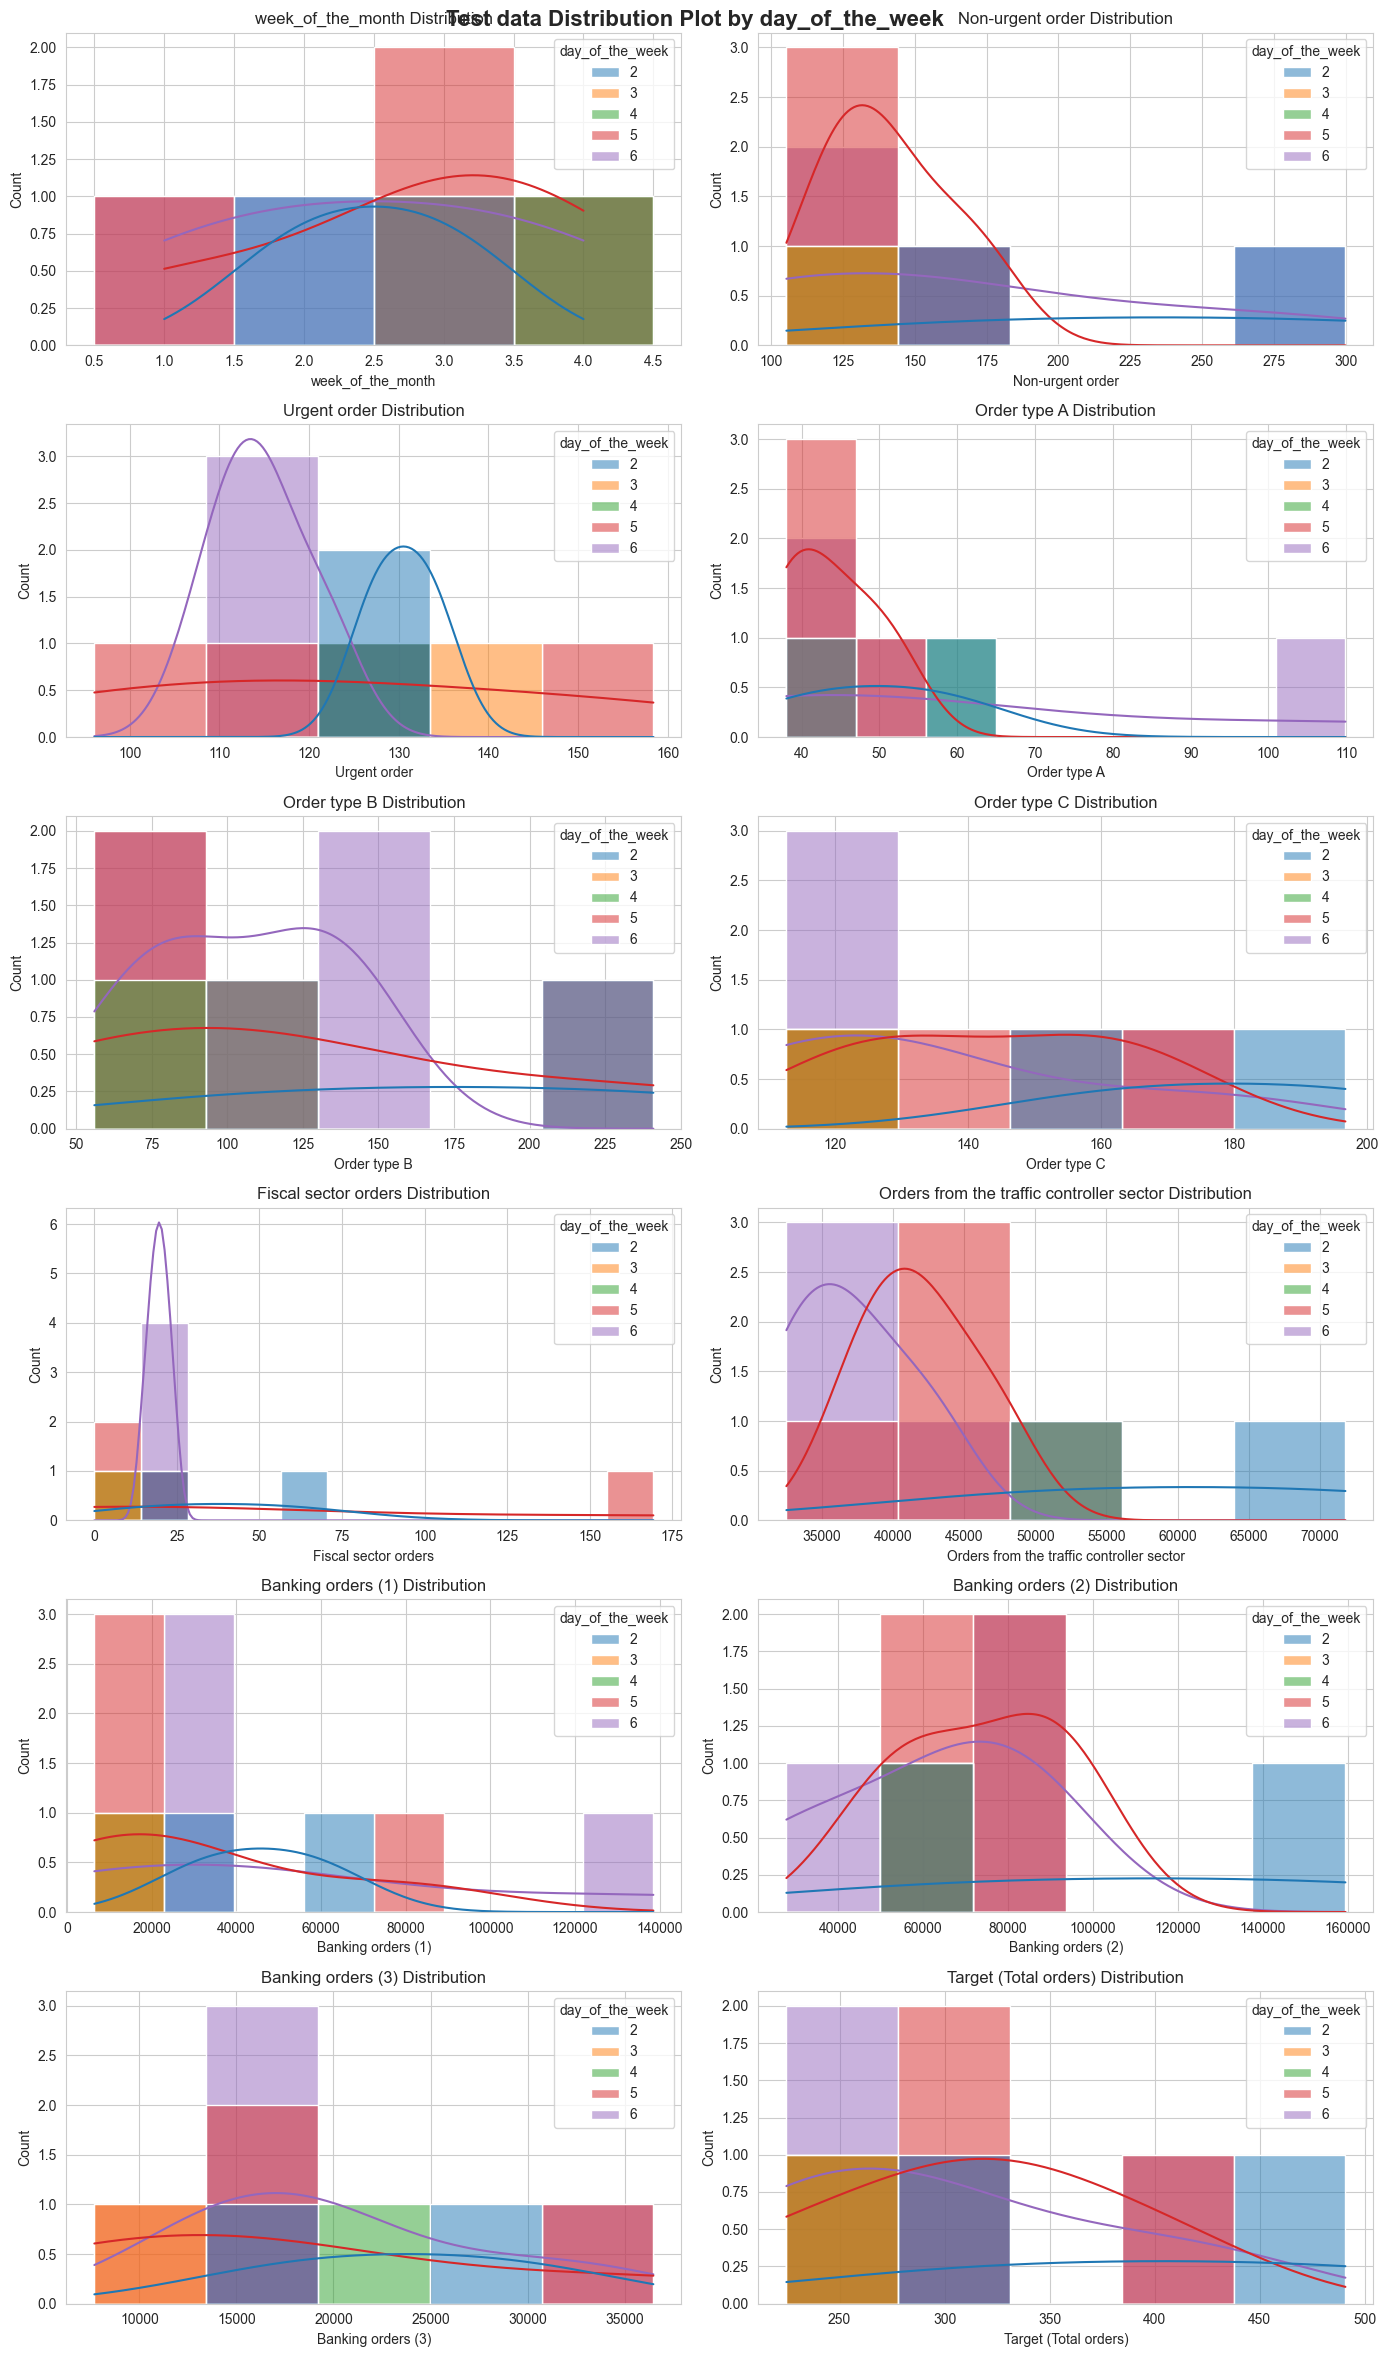

In [15]:
def plot_distribution(df, hue, title='', drop_cols=[]):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    n_cols = 2
    n_rows = (len(cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))

    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.histplot(data=df, x=var_name, kde=True, ax=ax, hue=hue) # sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Distribution Plot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()
    

plot_distribution(df_train, hue=cat_cols[1], title='Train data')
    
plot_distribution(df_test, hue=cat_cols[1], title='Test data')
# plot_distribution(original, hue='Sex', title='Original data')

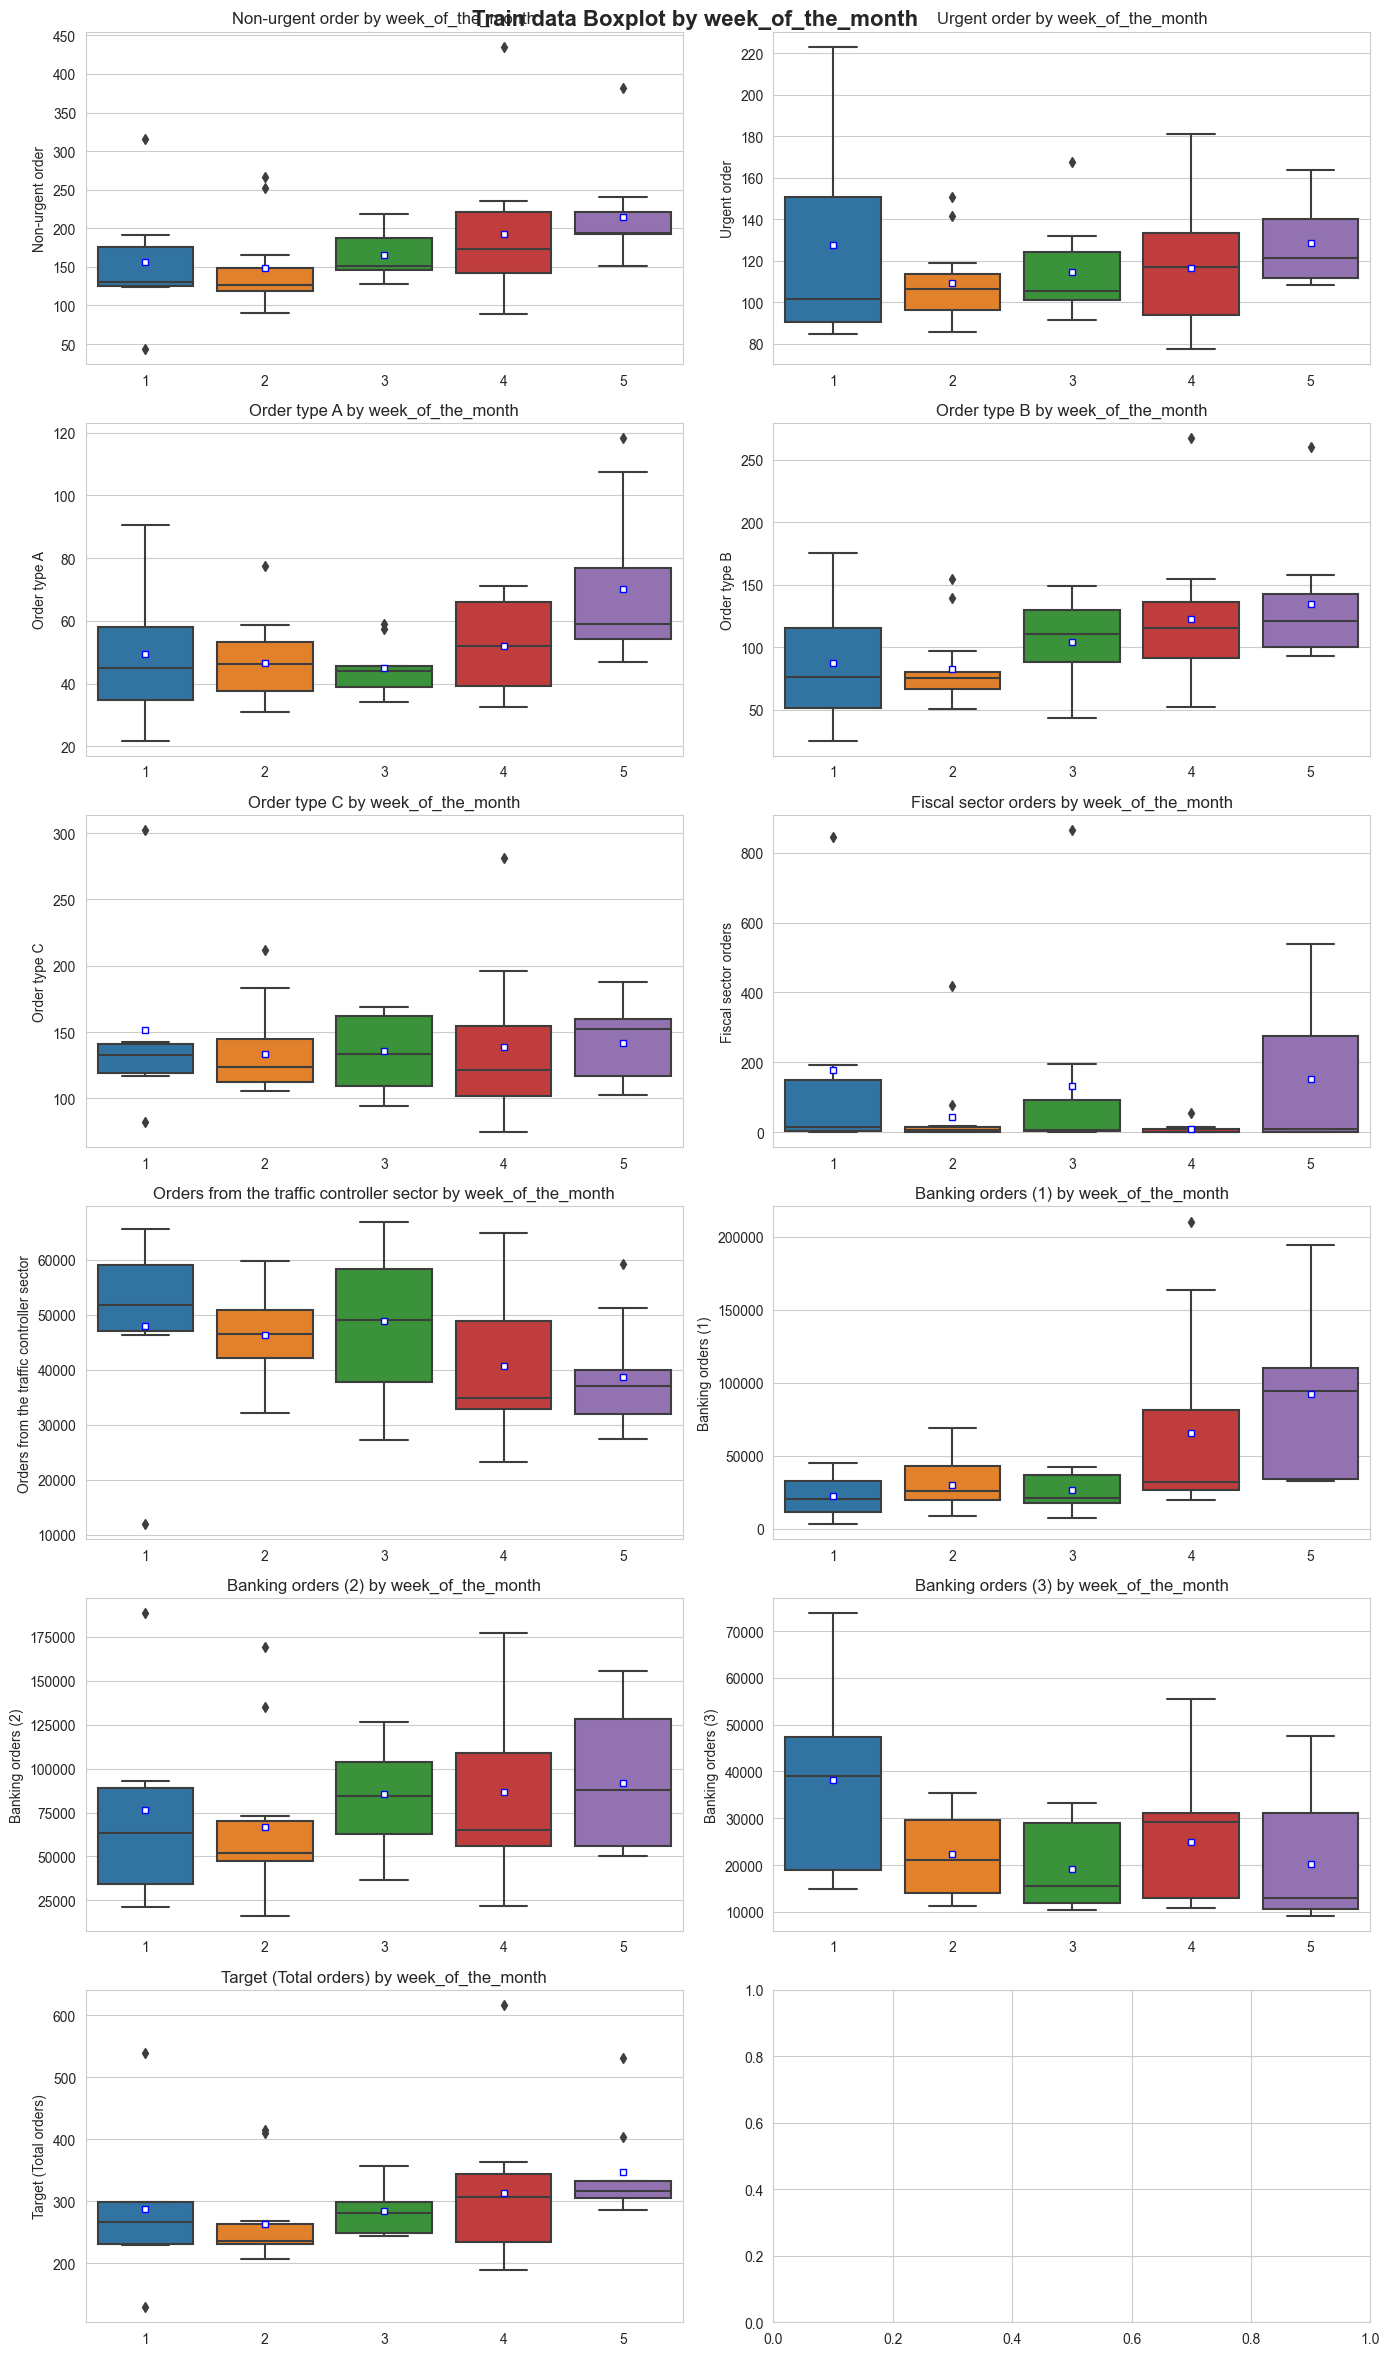

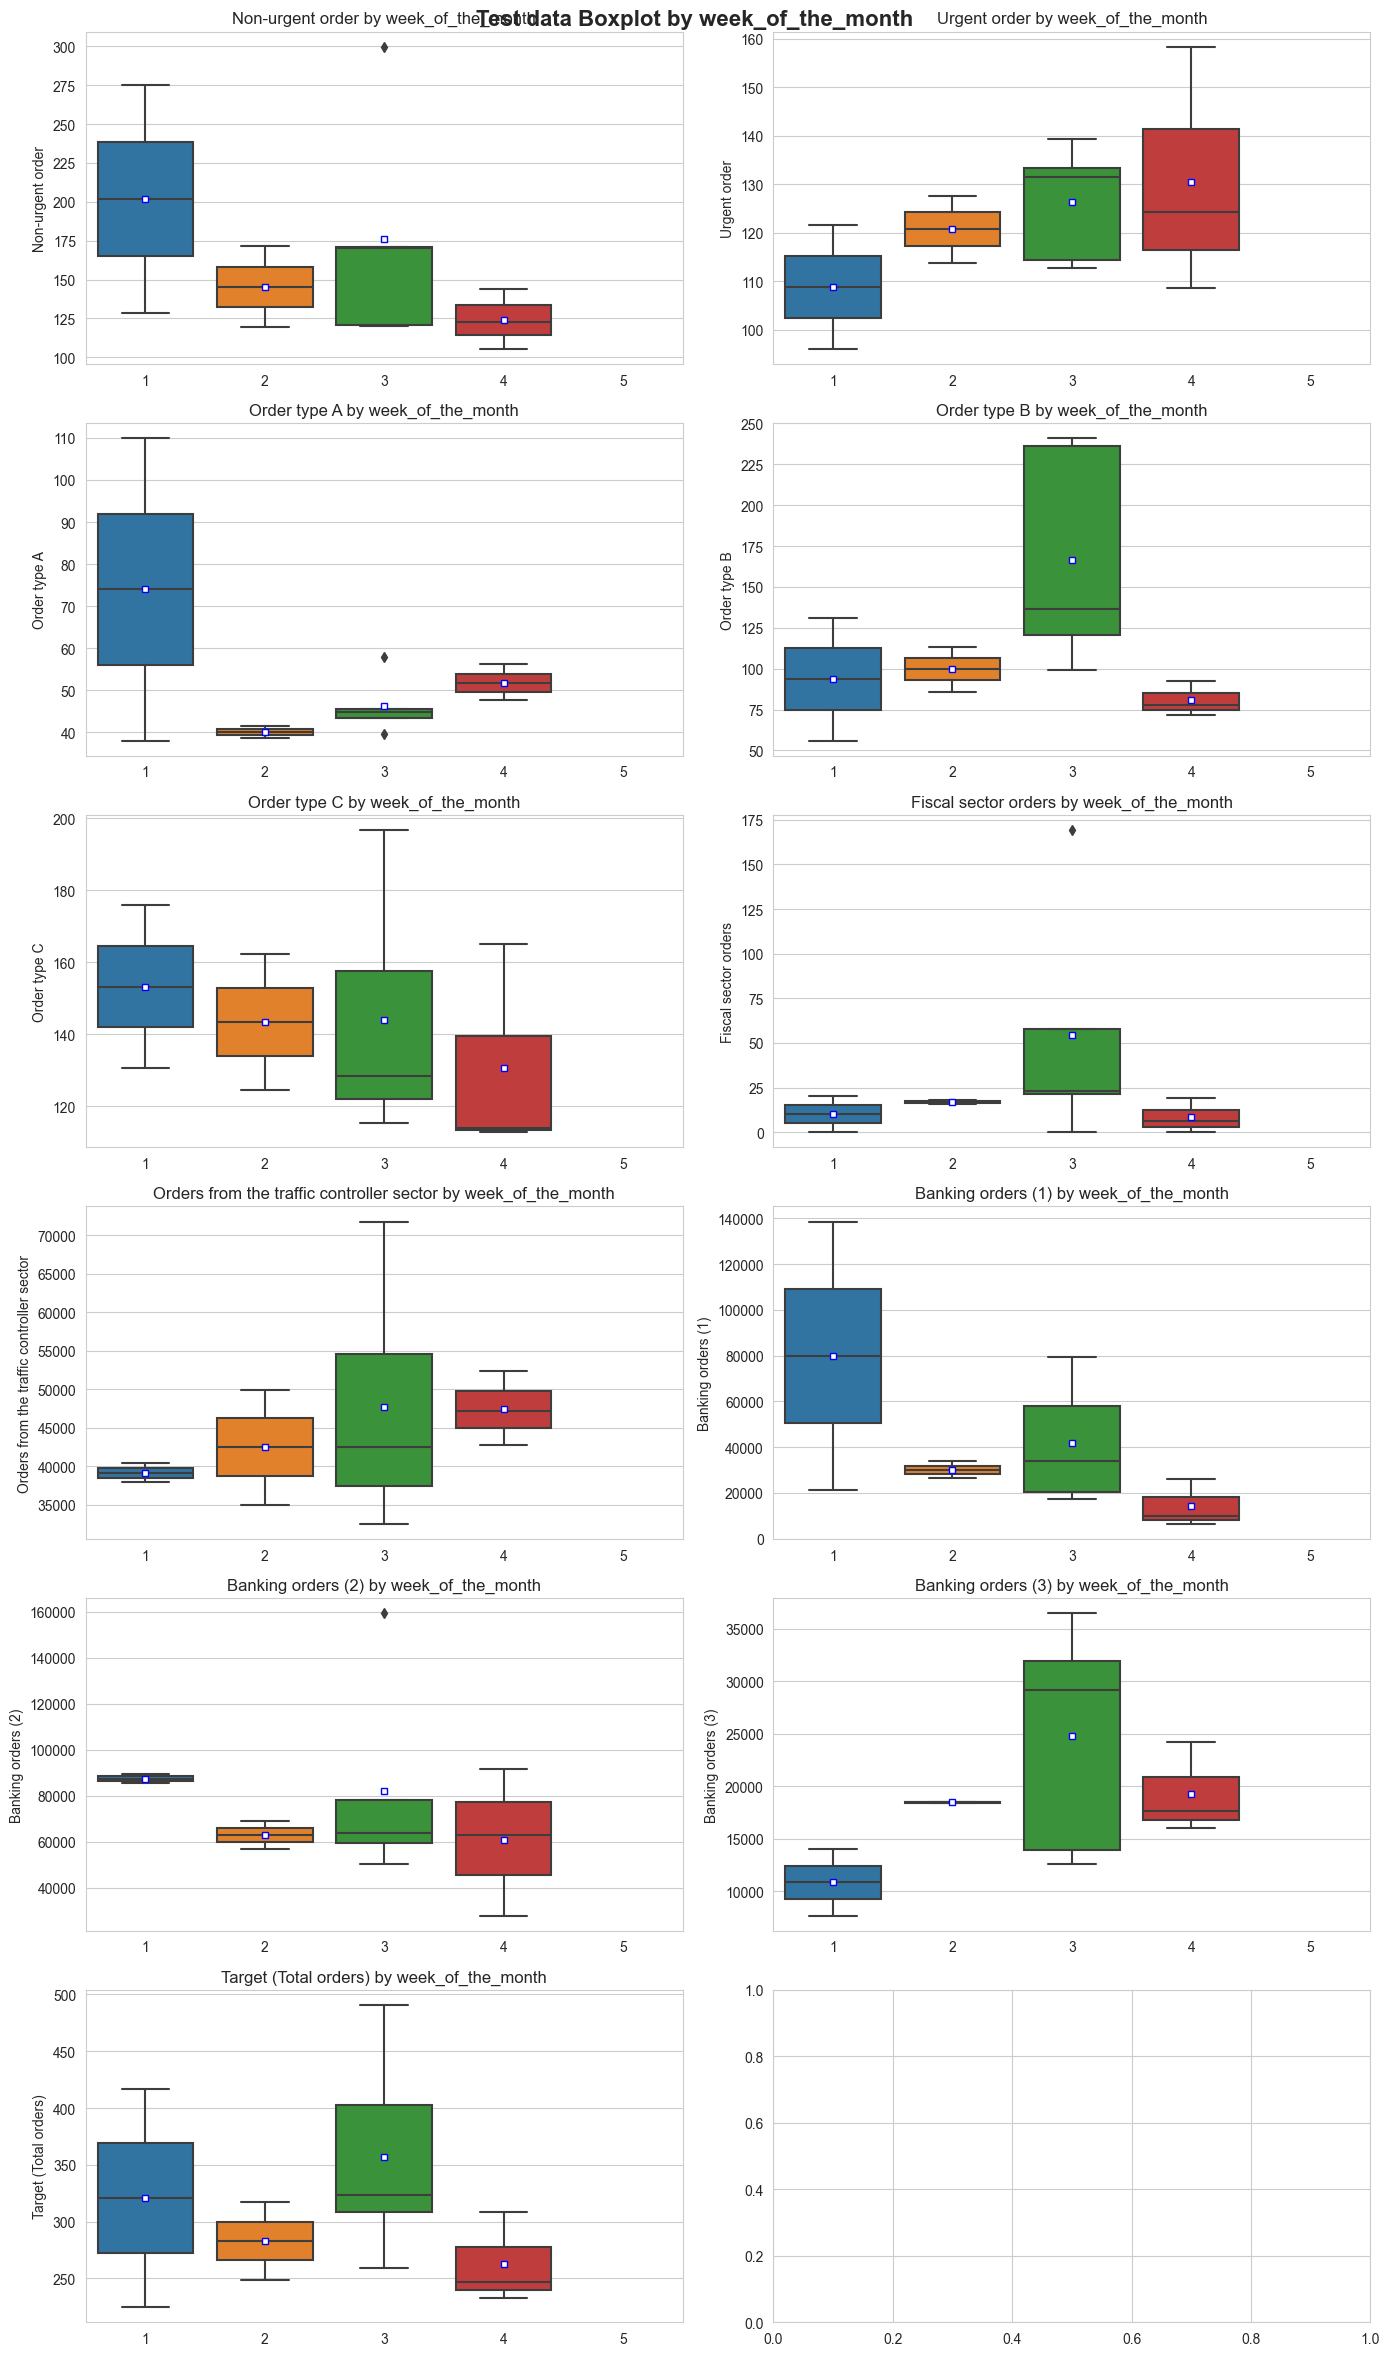

In [16]:
def plot_boxplot(df, hue, title='', drop_cols=[], n_cols=3):
    sns.set_style('whitegrid')

    cols = df.columns.drop(hue)
    cols = cols.drop(drop_cols)
    num_cols = [col for col in cols if col not in cat_cols]
    n_rows = (len(num_cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))

    for i, var_name in enumerate(num_cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.boxplot(data=df, x=hue, y=var_name, ax=ax, showmeans=True, 
                    meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue", "markersize":"5"})
        ax.set_title(f'{var_name} by {hue}')
        ax.set_xlabel('')

    fig.suptitle(f'{title} Boxplot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()


plot_boxplot(df_train, hue=cat_cols[0], title='Train data', n_cols=2)
plot_boxplot(df_test, hue=cat_cols[0], title='Test data', n_cols=2)

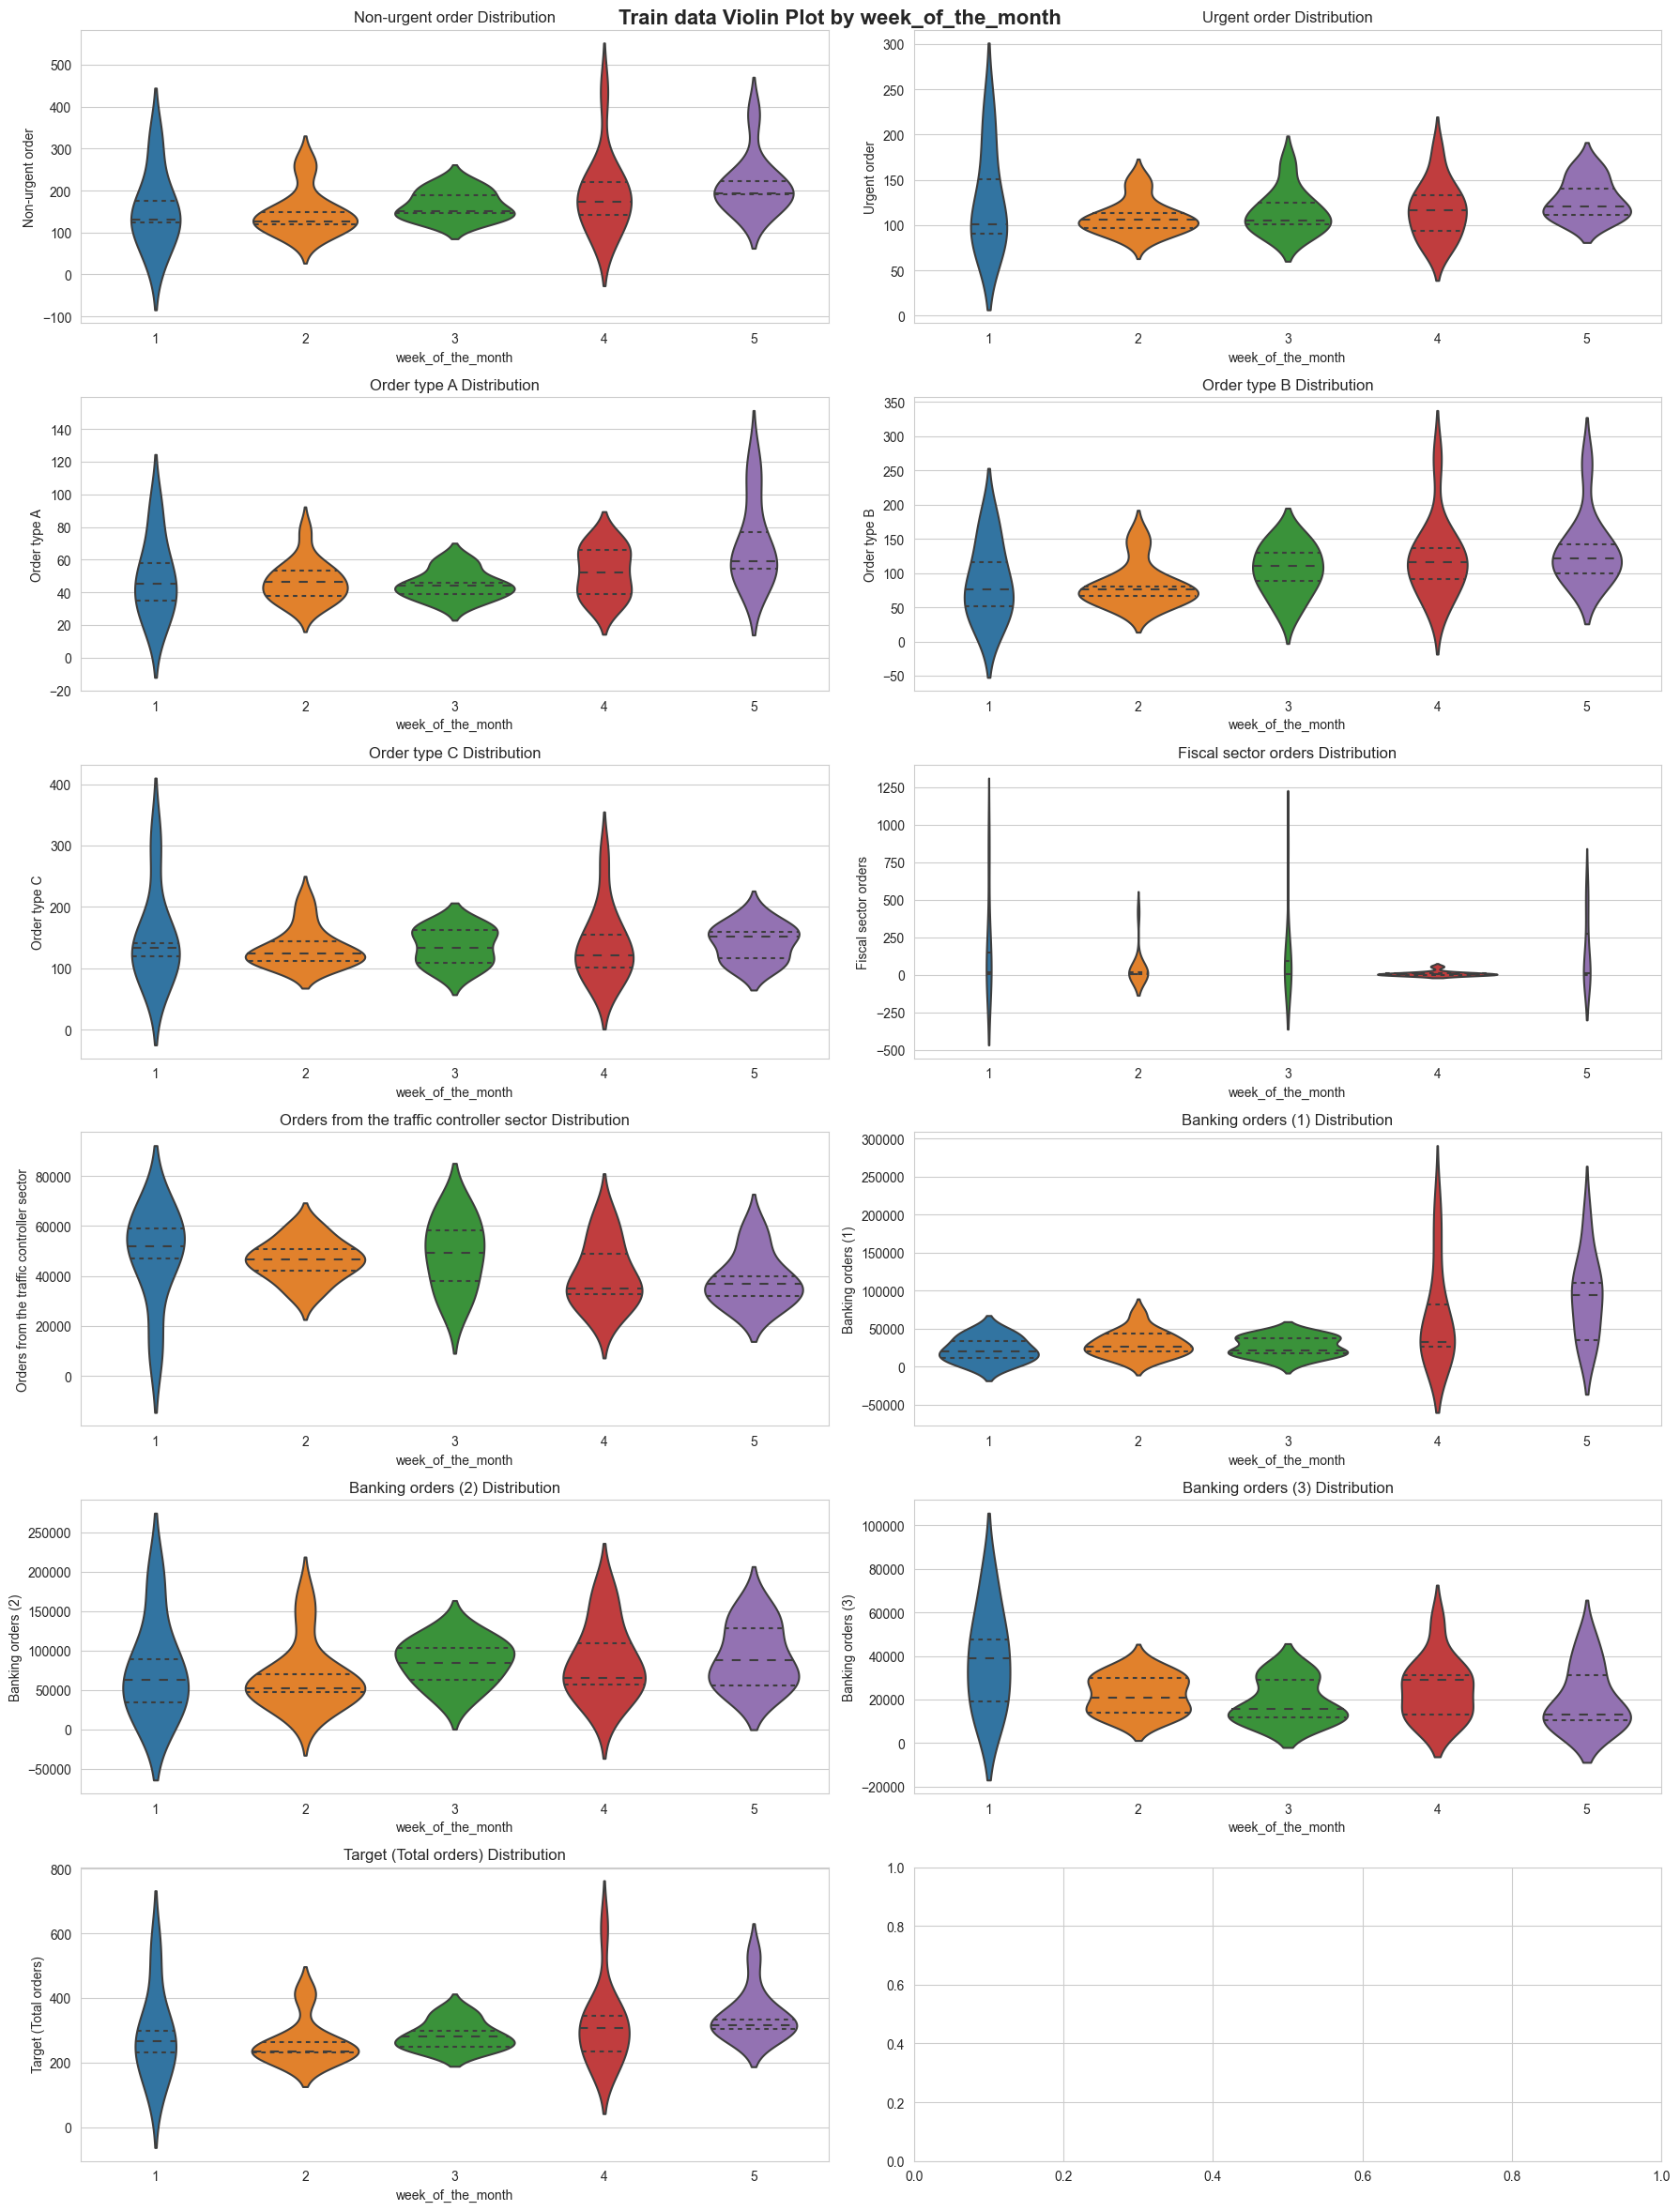

In [17]:
def plot_violinplot(df, hue, title='', drop_cols=[], n_cols=2):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    num_cols = [col for col in cols if col not in cat_cols]
    n_rows = (len(num_cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))

    for i, var_name in enumerate(num_cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.violinplot(data=df, x=hue, y=var_name, ax=ax, inner='quartile')
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Violin Plot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_violinplot(df_train, hue=cat_cols[0], title='Train data', n_cols=2)

# Feature Engineering

In [18]:
# # Choose the tactics
# CFG.encoder = True
# CFG.height_solver = True
# CFG.scaler = True

# Functions(Utils)

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from imblearn.over_sampling import SMOTE , ADASYN



class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Fertility'
    
    def overSample(X , y , tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled , y_resampled = smote.fit_resample(X , y)
            return X_resampled , y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled , y_resampled = adasyn.fit_resample(X , y)
            return X_resampled , y_resampled
            
    
    def trainTest(X , y , test_size = 0.2 , stratify = None):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model' , task = 'reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        
        if task == 'class':
            print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
            print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, pos_label=1)}')
            print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, pos_label=1)}')
            print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , pos_label=1)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
            print(f'{name} Test Recall : {recall_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Test Precision : {precision_score(y_test , y_pred, pos_label=1)}')
            print(f'{name} Test F1 : {f1_score(y_test , y_pred, pos_label=1)}')
        elif task == 'reg':
            print(f'{name} Train R2 : {r2_score(y_train , y_train_pred)}')
            print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
            print(f'{name} Train RMSE : {mean_squared_error(y_train , y_train_pred)**0.5}')
            print(f'{name} Train MSE : {mean_squared_error(y_train , y_train_pred)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test R2 : {r2_score(y_test , y_pred)}')
            print(f'{name} Test Mae : {mean_absolute_error(y_test, y_pred)}')
            print(f'{name} Test RMSE : {mean_squared_error(y_test , y_pred)**0.5}')
            print(f'{name} Test MSE : {mean_squared_error(y_test , y_pred)}')
        
    def get_r2_score(y_true, y_pred):
        return r2_score(y_true,y_pred)
    def get_mae_score(y_true, y_pred):
        return mean_absolute_error(y_true,y_pred)
    def get_rmse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)**0.5
    def get_mse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)
        
        
    def get_acc_score(y_true, y_pred):
        return accuracy_score(y_true , y_pred)    
    def get_f1_score(y_true, y_pred):
        return f1_score(y_true , y_pred , pos_label=1)
    
    def get_recall(y_true, y_pred):
        return recall_score(y_true, y_pred, pos_label=1)
    
    def get_roc_auc(y_true, y_pred):
        return roc_auc_score(y_true, y_pred, pos_label=1)
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'            
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
        
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))         
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Datamızın task'i, 'reg' or 'class'
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'classification':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , pos_label=1),
            "Precision" : precision_score(y_train, y_train_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , pos_label=1))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , pos_label=1),
            "Precision" : precision_score(y_test, y_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_test, y_pred , pos_label=1))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)

# Usage

In [20]:
train = df_train.copy()
test = df_test.copy()

X_train = train.drop([target_col], axis=1)
y_train = train[target_col]

X_test = test.drop([target_col], axis=1)
y_test = test[target_col] # Normally we won't have this.

# Data Splitting

In [21]:
from sklearn.model_selection import StratifiedKFold, KFold

class Splitter:
    def __init__(self, kfold=True, n_splits=5, cat_df=pd.DataFrame(), test_size=0.5):
        self.n_splits = n_splits
        self.kfold = kfold
        self.cat_df = cat_df
        self.test_size = test_size

    def split_data(self, X, y, random_state_list):
        if self.kfold == 'skf':
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, self.cat_df):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val, val_index
        elif self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val, val_index
        else:
            for random_state in random_state_list:
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val

# Define Models

## Linear Model

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train , y_train)

lr_train_pred = lr.predict(X_train)
lr_pred = lr.predict(X_test)

fonks.simple_scores(y_train, lr_train_pred , y_test , lr_pred , 'LR')

LR Train R2 : 1.0
LR Train Mae : 1.5181929787407473e-12
LR Train RMSE : 2.1611559610433072e-12
LR Train MSE : 4.670595087953021e-24

****************

LR Test R2 : 1.0
LR Test Mae : 1.7479351299698465e-12
LR Test RMSE : 2.0059298066534527e-12
LR Test MSE : 4.0237543892207584e-24


In [23]:
lr_r2 = fonks.get_r2_score(y_test , lr_pred)
lr_mae = fonks.get_mae_score(y_test , lr_pred)
lr_rmse = fonks.get_rmse_score(y_test , lr_pred)
# nb_rocauc = fonks.get_roc_auc(y_test , nb_pred , "NB")
# nb_rocauc = roc_auc_score(y_test, nb_pred, multi_class='ovo')

lr_df = fonks.train_test_df(y_train, lr_train_pred , y_test , lr_pred , 'LR')
lr_df

,LR_train,LR_test
R2,1.000000e+00,1.000000e+00
mae,1.518193e-12,1.747935e-12
mse,4.670595e-24,4.023754e-24
rmse,2.161156e-12,2.005930e-12


## Ridge Model

In [24]:
# Pass

## Lasso Model

In [25]:
# Pass

## SVR

In [26]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# import dpctl
# from sklearnex import patch_sklearn, config_context , unpatch_sklearn

# patch_sklearn()

# with config_context(target_offload = 'gpu:0'):
#     svr_base = SVR()

#     params = {'kernel' : ['linear' , 'poly' , 'rbf' ] , 'degree' : [2,3] , 'gamma' : ['scale' , 'auto'] , 'C' : np.arange(0.01,100,10) }

#     svr_grid = GridSearchCV(svr_base , params , scoring='neg_mean_squared_error' , cv = 3)
#     svr_grid.fit(X_train , y_train)

# print(f'Best parameters: {svr_grid.best_params_}')
# print(f'Best score: {svr_grid.best_score_:.2f}')

# unpatch_sklearn()

In [27]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf' , C=100)
svr.fit(X_train , y_train)

svr_train_pred = svr.predict(X_train)
svr_pred = svr.predict(X_test)

fonks.simple_scores(y_train, svr_train_pred , y_test , svr_pred , 'SVR')

SVR Train R2 : 0.8779553513085394
SVR Train Mae : 20.588073667603823
SVR Train RMSE : 31.67456696965673
SVR Train MSE : 1003.2781927152691

****************

SVR Test R2 : 0.3411026459818274
SVR Test Mae : 50.52183161555613
SVR Test RMSE : 64.62692279674472
SVR Test MSE : 4176.639150176403


In [28]:
# # Very bad results.

# svr_r2 = fonks.get_r2_score(y_test , svr_pred)
# svr_mae = fonks.get_mae_score(y_test , svr_pred)
# svr_rmse = fonks.get_rmse_score(y_test , svr_pred)

# svr_df = fonks.train_test_df(y_train, svr_train_pred , y_test , svr_pred , 'SVR')

# all_df = pd.concat([all_df , svr_df] , axis = 1)
# all_df

# Decision Tree

In [29]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV
# import dpctl
# from sklearnex import patch_sklearn, config_context , unpatch_sklearn

# patch_sklearn()

# with config_context(target_offload = 'gpu:0'):
#     dt_base = DecisionTreeRegressor(random_state= 53)

#     params = {'max_depth' : np.arange(2,7) , 'min_samples_split' : np.arange(2,6)}

#     dt_grid = GridSearchCV(dt_base , params , cv = 3 , scoring= 'neg_root_mean_squared_error' )
#     dt_grid.fit(X_train , y_train)

# print(f"DT Best Params is : {dt_grid.best_params_}")
# print(f"DT Best Score is : {dt_grid.best_score_}")

# unpatch_sklearn()

In [30]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5 , min_samples_split=2 , random_state= 6)
dt.fit(X_train , y_train)

dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_test)

fonks.simple_scores(y_train, dt_train_pred , y_test , dt_pred , 'DT')

DT Train R2 : 0.9970914824075464
DT Train Mae : 3.4866741452991477
DT Train RMSE : 4.889755715117645
DT Train MSE : 23.90971095352567

****************

DT Test R2 : 0.5504160941364136
DT Test Mae : 32.898870726495716
DT Test RMSE : 53.383860109231215
DT Test MSE : 2849.8365201619677


In [31]:
# # Very bad results.

# dt_r2 = fonks.get_r2_score(y_test , dt_pred)
# dt_mae = fonks.get_mae_score(y_test , dt_pred)
# dt_rmse = fonks.get_rmse_score(y_test , dt_pred)

# dt_df = fonks.train_test_df(y_train, dt_train_pred , y_test , dt_pred , 'DT')
# all_df = pd.concat([all_df , dt_df] , axis = 1)
# all_df

## Random Forest

In [32]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# import dpctl
# from sklearnex import patch_sklearn, config_context , unpatch_sklearn

# patch_sklearn()

# with config_context(target_offload = 'gpu:0'):
#     rf_base = RandomForestRegressor()

#     params = {'n_estimators' : np.arange(80,1000,10) , 'max_depth' : np.arange(2,11) , 'max_features' : np.arange(2,6) , 'min_samples_split' : [2,3]}

#     rf_rnd = RandomizedSearchCV(rf_base , params , scoring= 'neg_root_mean_squared_error' , cv = 3 , n_iter = 30)
#     rf_rnd.fit(X_train , y_train)

# print(f"RF Best Params is : {rf_rnd.best_params_}")
# print(f"RF Best Score is : {rf_rnd.best_score_}")

# unpatch_sklearn()

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 200 , max_depth=5 , min_samples_split=2 , max_features=4)
rf.fit(X_train , y_train)

rf_train_pred = rf.predict(X_train)
rf_pred = rf.predict(X_test)

fonks.simple_scores(y_train, rf_train_pred , y_test , rf_pred , 'RF')

RF Train R2 : 0.9807061439781375
RF Train Mae : 8.048840270303428
RF Train RMSE : 12.593917155278165
RF Train MSE : 158.60674931400968

****************

RF Test R2 : 0.858856014046995
RF Test Mae : 21.19664867903274
RF Test RMSE : 29.911334164084458
RF Test MSE : 894.6879114755261


In [34]:
rf_r2 = fonks.get_r2_score(y_test , rf_pred)
rf_mae = fonks.get_mae_score(y_test , rf_pred)
rf_rmse = fonks.get_rmse_score(y_test , rf_pred)

rf_df = fonks.train_test_df(y_train, rf_train_pred , y_test , rf_pred , 'RF')

all_df = lr_df.copy()
all_df = pd.concat([all_df , rf_df] , axis = 1)
all_df

,LR_train,LR_test,RF_train,RF_test
R2,1.000000e+00,1.000000e+00,0.980706,0.858856
mae,1.518193e-12,1.747935e-12,8.048840,21.196649
mse,4.670595e-24,4.023754e-24,158.606749,894.687911
rmse,2.161156e-12,2.005930e-12,12.593917,29.911334


## Gradient Boosting

In [35]:
# from sklearn.ensemble import GradientBoostingRegressor

# patch_sklearn()

# with config_context(target_offload = 'gpu:0'):
#     gb_base = GradientBoostingRegressor()

#     params = {'n_estimators' : np.arange(80,1000,10) , 'learning_rate' : [0.001,0.01,0.1,1] , 'subsample' : [0.8 , 1] , 'max_depth' : np.arange(2,11)}

#     gb_rnd = RandomizedSearchCV(gb_base , params , scoring= 'neg_root_mean_squared_error' , cv = 5 , n_iter=50)
#     gb_rnd.fit(X_train , y_train)

# print(f"GB Best Params is : {gb_rnd.best_params_}")
# print(f"GB Best Score is : {gb_rnd.best_score_}")

# unpatch_sklearn()

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators= 200 , max_depth=4 , learning_rate= 0.01 , subsample= 0.6 )
gb.fit(X_train , y_train)

gb_train_pred = gb.predict(X_train)
gb_pred = gb.predict(X_test)

fonks.simple_scores(y_train, gb_train_pred , y_test , gb_pred , 'GB')

GB Train R2 : 0.9642322111444125
GB Train Mae : 11.635670344983845
GB Train RMSE : 17.147363801738006
GB Train MSE : 294.03208534915484

****************

GB Test R2 : 0.8211309142327382
GB Test Mae : 24.322523875486212
GB Test RMSE : 33.6722579250877
GB Test MSE : 1133.8209537736311


In [37]:
gb_r2 = fonks.get_r2_score(y_test , gb_pred)
gb_mae = fonks.get_mae_score(y_test , gb_pred)
gb_rmse = fonks.get_rmse_score(y_test , gb_pred)

gb_df = fonks.train_test_df(y_train, gb_train_pred , y_test , gb_pred , 'GB')
all_df = pd.concat([all_df , gb_df] , axis = 1)
all_df

,LR_train,LR_test,RF_train,RF_test,GB_train,GB_test
R2,1.000000e+00,1.000000e+00,0.980706,0.858856,0.964232,0.821131
mae,1.518193e-12,1.747935e-12,8.048840,21.196649,11.635670,24.322524
mse,4.670595e-24,4.023754e-24,158.606749,894.687911,294.032085,1133.820954
rmse,2.161156e-12,2.005930e-12,12.593917,29.911334,17.147364,33.672258


## XGBoost

In [38]:
# from xgboost import XGBRegressor

# patch_sklearn()

# with config_context(target_offload = 'gpu:0'):
#     xgb_base = XGBRegressor(tree_method = 'gpu_hist')

#     params = {
#         'learning_rate': [0.01, 0.05, 0.1],
#         'n_estimators': [100, 200, 300],
#         'max_depth': [3, 5, 7],
#         'min_child_weight': [1, 3, 5],
#         'gamma': [0, 0.1, 0.2],
#         'subsample': [0.7, 0.8, 0.9],
#         'colsample_bytree': [0.6, 0.7, 0.8],
#         'reg_alpha': [0, 0.01, 0.05],
#         'reg_lambda': [0, 0.01, 0.05],
#     }

#     params2 = {
#         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#         'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#         'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#         'n_estimators': [100, 200, 300, 400, 500],
#         'gamma': [0, 1, 5, 10],
#         'min_child_weight': [1, 3, 5, 7],
#         'scale_pos_weight': [1, 2, 3, 4, 5]
#     }

#     xgb_rnd = RandomizedSearchCV(xgb_base , params , scoring= 'neg_root_mean_squared_error' , cv = 5 , n_iter= 100)
#     xgb_rnd.fit(X_train , y_train)

# print(f"XGB Best Params is : {xgb_rnd.best_params_}")
# print(f"XGB Best Score is : {xgb_rnd.best_score_}")

# unpatch_sklearn()

In [39]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 100 , min_child_weight = 5 , max_depth = 5 , learning_rate = 0.06 , gamma = 0, colsample_bytree = 0.6 , subsample= 0.6 , reg_alpha = 0.05 , reg_lambda=0.01 , enable_categorical = True , tree_method = 'gpu_hist' )
xgb.fit(X_train , y_train)

xgb_train_pred = xgb.predict(X_train)
xgb_pred = xgb.predict(X_test)

fonks.simple_scores(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')

XGB Train R2 : 0.9243725381883865
XGB Train Mae : 13.474842130025225
XGB Train RMSE : 24.933949637510654
XGB Train MSE : 621.7018445259177

****************

XGB Test R2 : 0.6416666993339176
XGB Test Mae : 32.94839165242514
XGB Test RMSE : 47.659357220749385
XGB Test MSE : 2271.4143306949964


In [40]:
xgb_r2 = fonks.get_r2_score(y_test , xgb_pred)
xgb_mae = fonks.get_mae_score(y_test , xgb_pred)
xgb_rmse = fonks.get_rmse_score(y_test , xgb_pred)

xgb_df = fonks.train_test_df(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')
all_df = pd.concat([all_df , xgb_df] , axis = 1)
all_df

,LR_train,LR_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test
R2,1.000000e+00,1.000000e+00,0.980706,0.858856,0.964232,0.821131,0.924373,0.641667
mae,1.518193e-12,1.747935e-12,8.048840,21.196649,11.635670,24.322524,13.474842,32.948392
mse,4.670595e-24,4.023754e-24,158.606749,894.687911,294.032085,1133.820954,621.701845,2271.414331
rmse,2.161156e-12,2.005930e-12,12.593917,29.911334,17.147364,33.672258,24.933950,47.659357


# LightGBM

In [41]:
# from lightgbm import LGBMRegressor

# patch_sklearn()

# with config_context(target_offload='gpu:0'):
#         lgb_base = LGBMRegressor(device = 'gpu')

#         params = {
#                 'n_estimators': [100, 200, 300],
#                 'max_depth': [3, 5, 7 , 6 , 7, 8],
#                 'learning_rate': [1,0.1,0.01],
#                 'subsample': [0.7,0.8, 0.9, 1.0],
#                 'colsample_bytree': [0.8, 0.9, 1.0],
#                 }

#         lgb_grid = GridSearchCV(lgb_base , params , scoring='neg_mean_squared_error' , cv = 3)
#         lgb_grid.fit(X_train,y_train)


# print(f'Best parameters: {lgb_grid.best_params_}')
# print(f'Best score: {lgb_grid.best_score_:.2f}')

# unpatch_sklearn()

In [42]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators= 300 , learning_rate = 0.01 , max_depth = 6 , subsample = 0.8 , colsample_bytree = 0.9)
# lgb = lgb_grid.best_estimator_
lgb.fit(X_train , y_train)

lgb_train_pred = lgb.predict(X_train)
lgb_pred = lgb.predict(X_test)

fonks.simple_scores(y_train, lgb_train_pred , y_test , lgb_pred , 'LGB')

LGB Train R2 : 0.6919953264745002
LGB Train Mae : 28.77857609759744
LGB Train RMSE : 50.31876444112734
LGB Train MSE : 2531.978054881661

****************

LGB Test R2 : 0.550066461194126
LGB Test Mae : 36.569636589893385
LGB Test RMSE : 53.40461388671328
LGB Test MSE : 2852.0527843889286


In [43]:
lgb_r2 = fonks.get_r2_score(y_test , lgb_pred)
lgb_mae = fonks.get_mae_score(y_test , lgb_pred)
lgb_rmse = fonks.get_rmse_score(y_test , lgb_pred)

lgb_df = fonks.train_test_df(y_train, xgb_train_pred , y_test , lgb_pred , 'LGB')
all_df = pd.concat([all_df , lgb_df] , axis = 1)
all_df

,LR_train,LR_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGB_train,LGB_test
R2,1.000000e+00,1.000000e+00,0.980706,0.858856,0.964232,0.821131,0.924373,0.641667,0.924373,0.550066
mae,1.518193e-12,1.747935e-12,8.048840,21.196649,11.635670,24.322524,13.474842,32.948392,13.474842,36.569637
mse,4.670595e-24,4.023754e-24,158.606749,894.687911,294.032085,1133.820954,621.701845,2271.414331,621.701845,2852.052784
rmse,2.161156e-12,2.005930e-12,12.593917,29.911334,17.147364,33.672258,24.933950,47.659357,24.933950,53.404614


# CatBoost

In [44]:
params = {'learning_rate': 0.03,
          'objective':'MAE',
          'depth': 6,
          'early_stopping_rounds':1000,
          'iterations': 10000,
          'use_best_model': True,
          'eval_metric': "RMSE",
          'random_state': 986,
          'allow_writing_files': False,
          'thread_count':24
          }

In [45]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(**params,
                       cat_features=cat_cols
                        )
cb.fit(X_train,y_train,
        eval_set=[(X_test,y_test)],
        verbose=500)

cb_train_pred = cb.predict(X_train)
cb_pred = cb.predict(X_test)

fonks.simple_scores(y_train, cb_train_pred , y_test , cb_pred , 'CB')

0:	learn: 89.8572150	test: 85.7199056	best: 85.7199056 (0)	total: 158ms	remaining: 26m 17s
500:	learn: 0.7846009	test: 47.1797774	best: 47.1787744 (494)	total: 7.12s	remaining: 2m 14s
1000:	learn: 0.0174938	test: 47.0517469	best: 47.0517453 (999)	total: 14s	remaining: 2m 5s
1500:	learn: 0.0009545	test: 47.0489473	best: 47.0489467 (1495)	total: 19.9s	remaining: 1m 52s
2000:	learn: 0.0000664	test: 47.0487123	best: 47.0487123 (2000)	total: 25.8s	remaining: 1m 43s
2500:	learn: 0.0000336	test: 47.0487021	best: 47.0487018 (2347)	total: 32.2s	remaining: 1m 36s
3000:	learn: 0.0000228	test: 47.0487009	best: 47.0487009 (2999)	total: 38.3s	remaining: 1m 29s
3500:	learn: 0.0000136	test: 47.0487003	best: 47.0487003 (3492)	total: 43.9s	remaining: 1m 21s
4000:	learn: 0.0000130	test: 47.0486996	best: 47.0486995 (3975)	total: 47.7s	remaining: 1m 11s
4500:	learn: 0.0000118	test: 47.0486987	best: 47.0486986 (4476)	total: 51.3s	remaining: 1m 2s
5000:	learn: 0.0000114	test: 47.0486986	best: 47.0486986 (494

In [46]:
cb_r2 = fonks.get_r2_score(y_test , cb_pred)
cb_mae = fonks.get_mae_score(y_test , cb_pred)
cb_rmse = fonks.get_rmse_score(y_test , cb_pred)

cb_df = fonks.train_test_df(y_train, cb_train_pred , y_test , cb_pred , 'CB')
all_df = pd.concat([all_df , cb_df] , axis = 1)
all_df

,LR_train,LR_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGB_train,LGB_test,CB_train,CB_test
R2,1.000000e+00,1.000000e+00,0.980706,0.858856,0.964232,0.821131,0.924373,0.641667,0.924373,0.550066,0.987188,0.650790
mae,1.518193e-12,1.747935e-12,8.048840,21.196649,11.635670,24.322524,13.474842,32.948392,13.474842,36.569637,5.514013,29.326569
mse,4.670595e-24,4.023754e-24,158.606749,894.687911,294.032085,1133.820954,621.701845,2271.414331,621.701845,2852.052784,105.321032,2213.580111
rmse,2.161156e-12,2.005930e-12,12.593917,29.911334,17.147364,33.672258,24.933950,47.659357,24.933950,53.404614,10.262604,47.048699


# Compare Models

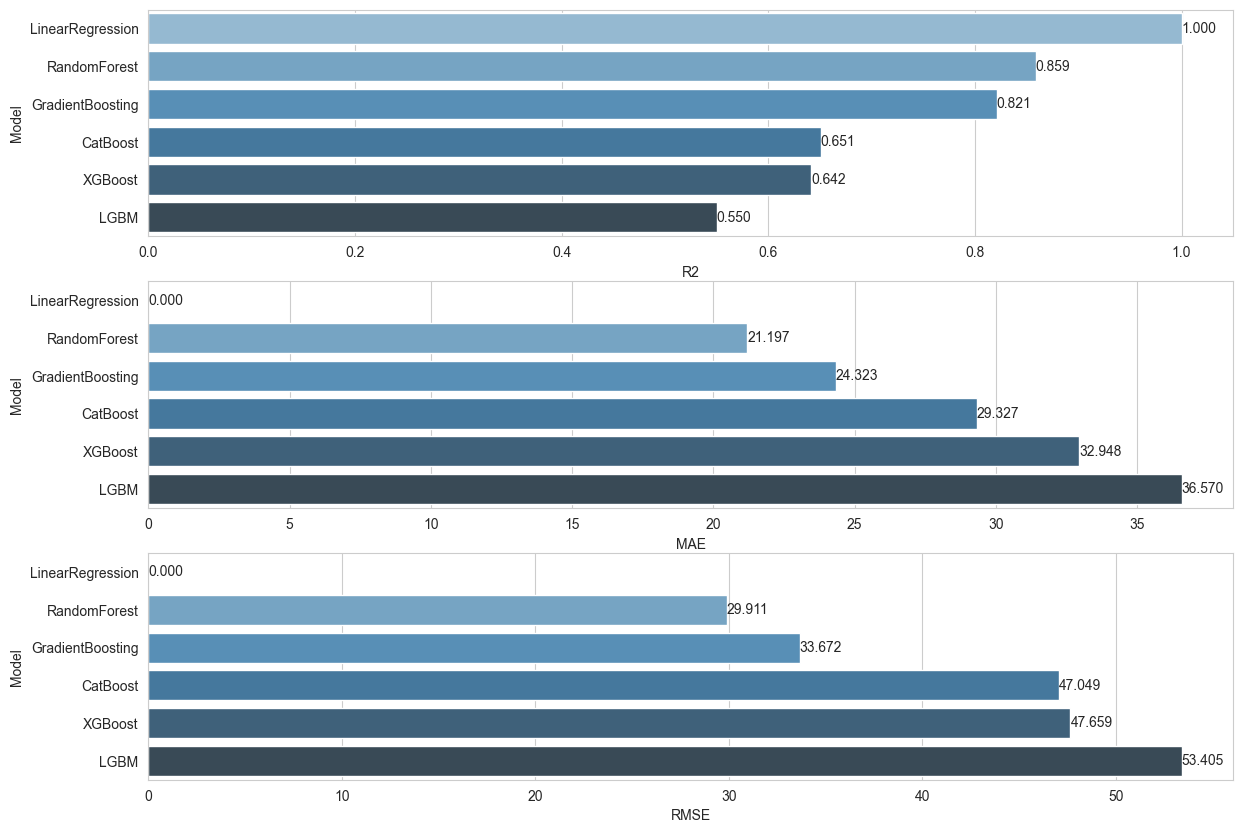

In [47]:
compare = pd.DataFrame({"Model": ["LinearRegression", "RandomForest", "GradientBoosting",
                                 "XGBoost", "LGBM" , "CatBoost"],
                        "R2": [lr_r2, rf_r2 , gb_r2, xgb_r2, lgb_r2 , cb_r2],
                        "MAE": [lr_mae, rf_mae, gb_mae, xgb_mae, lgb_mae , cb_mae],
                        "RMSE": [lr_rmse,  rf_rmse, gb_rmse, xgb_rmse, lgb_rmse , cb_rmse],
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="R2", ascending=False)
ax=sns.barplot(x="R2", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="MAE", ascending=True)
ax=sns.barplot(x="MAE", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="RMSE", ascending=True)
ax=sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [48]:
# LinearRegression is the best so far.

In [49]:
# Done.

# Alternative

In [50]:
# Pass for now.